# Lab 3: Pandas

(Last update: 07/12/2023)

Full name: Huỳnh Trí Nhân  
Student ID: 21120302

---

**Tóm tắt**: In this assignment, you are going to learn how to use `Pandas`. Loops, and methods such as `apply/applymap` are not allowed to use unless specifically instructed to do so.

## 0. General instructions

### 0.0. Work on assignment

- You will do your assignment directly on this notebook file. First, you fill your name and student code at the beginning of the file. In this file, you will write your code when you see the following lines of code:
    ```python
    # TODO
    raise NotImplementedError()
    ```

    For optional coding parts, there will be:

    ```python
    # TODO (OPTIONAL)
    ```

    For markdown cell, there will be:

    ```markdown
    **TODO**: ...
    ```

- Of course, you have to remove the `raise NotImplementedError()` statement when you finish.

- For coding parts, there are often cells below to help you check your answers. You will pass the test if there are no errors when you run the test cells. In some cases, the tests are insufficient. That means if you do not pass the test, your answer is definitely wrong somewhere, but if you pass the test, your answer may still be incorrect.

- While doing the assignment, you should print out the output and create more cells for testing. But you have to remove all of them (comment your print-out codes, delete the cell created by you) when you submit your code. <font color=red>Do not remove or edit my cells</font> (except for the aforementioned cells).

- Keep your code clean and clear by using meaningful variable names and comments, not write too-long coding lines. Press `Ctrl + S` right after editing.

- **Keep it real**: The reason why you are here is to <font color=green>study, really study</font>. I highly recommend that you discuss your idea with your friends and <font color=green>write your own code based on your own knowledge</font>. <font color=red>Copy means zero.</font>

### 0.1. Submit your assignment

- When grading your assignment, I will choose `Kernel` - `Restart & Run All` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename the notebook as `<Student ID>.ipynb`. For example, if your student code is 1234567, then your notebook is `1234567.ipynb`.

- Finally, submit your notebook file on Moodle. <font color=red>Please strictly follow the submission rules.</font>

---

## 1. Import libraries

In [67]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
warnings.simplefilter('ignore')

# TODO (OPTION): import your libraries
from sklearn.preprocessing import OneHotEncoder
# Để vẽ biểu đồ heatmap
import seaborn as sns

## 2. Data collection

- I have done that for you. In this assignment, you are going to analyze a dataset collected from **A survey on facial cleanser consumption behavior of 18-25 year olds in HCM City**. You are provided the following files:
    - `./survey.csv`: Survey results of more than 300 people taking part in the survey on GoogleForm. You will mainly work on this file.
    - `./survey.xlsx`: The content is similar to `./survey.csv` but you can open it in Excel to have a better view.
    - `./form.pdf`: Questionnaire survey.

- Read `./form.pdf` and summarize the survey by indicating **sections** in the form as well as **possible scenarios** when conducting the survey.

    **TODO**: ...
    - Khảo sát nói về nghiên cứu hành vi tiêu dùng của những người tham gia để phát triễn dòng sửa rửa mặt mới.
    - Đầu tiên người khảo sát được hỏi về câu hỏi về thông tin casd nhân: email, độ tuổi, giới tính và nơi sống
    - Tiếp theo, người tham được hỏi về thông tin về nhu sầu sửa rửa mặt: đã dùng, chưa dùng, nguyên nhân chưa dùng.  
    - Tiếp theo người dùng sẽ được hỏi về hành vi sử dụng sửa rữa mặt: Các câu hỏi có một lựa chọn và nhiều lựa chọn
      - Câu hỏi một lựa chọn
      - Câu hỏi nhiều lựa chọn: mục đích sử dụng, khi nào sử dụng, nơi mua sữa rửa mặt, ...
      - Câu hỏi có nhiều lựa chọn và lựa chọn khác: lựa chọn khác sẽ có một ô để người dùng tự điền
      => điều này gây khó khăn cho việc phân tích dữ liệu, vì có nhiều trường hợp có thể xảy ra:
        - Người dùng không chọn lựa chọn khác
        - Người dùng chọn lựa chọn khác và điền những dữ liệu của giá trị ở trên vào ô khác
        - Người dùng chọn lựa chọn khác nhưng điền dữ liệu không phù hợp, không đúng định dạng với những người tham gia khác.
- Data source: Võ Thị Minh Trà, University of Economics Ho Chi Minh City.

## 3. Data pre-processing and exploration

- In this section, you are going to explore features of data. First, you have to read the data from `./survey.csv` and store it into a dataframe called `survey_df`.

In [68]:
# TODO: read data from ./survey.csv and save to survey_df then display 5 first lines of data
survey_df = pd.read_csv('./survey.csv')
survey_df.head(5)

,Dấu thời gian,Bạn bao nhiêu tuổi?,Hiện tại bạn đang cư trú ở đâu?,Bạn đã sử dụng sữa rửa mặt bao giờ chưa?,Nguyên nhân bạn chưa sử dụng sữa rửa mặt là gì?,Giới tính của bạn là?,1. Bạn sử dụng sữa rửa mặt với mục đích gì?,2. Da của bạn thuộc loại da gì?,3. Bạn thường sử dụng sữa rửa mặt bao nhiêu lần một ngày?,4. Bạn sử dụng sữa rửa mặt khi nào?,...,20. Bạn lo ngại điều gì khi sử dụng sữa rửa mặt?,"21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nb, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Chất lượng]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Thương hiệu]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Giá cả]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Mẫu mã]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Xuất xứ]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Thành phần]","21. Đánh giá MỨC ĐỘ ẢNH HƯỞNG của các yếu tố sau đến quyết định mua hàng của bạn\nThang đo: 1: Rất không ảnh hưởng, 2: Không ảnh hưởng, 3: Hơi không ảnh hưởng, 4: Bình thường, 5: Hơi ảnh hưởng, 6: Ảnh hưởng, 7: Rất ảnh hưởng [Mùi hương]","22. Nếu chúng tôi ra mắt một sản phẩm sữa rửa mặt mới, bạn có sẵn sàng dùng thử hay không?",23. Bạn mong muốn điều gì nhất ở một sản phẩm sữa rửa mặt mới?
0,04/02/2023 20:10:08,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da hỗn hợp,Ít hơn 1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",7.0,5.0,7.0,5.0,5.0,3.0,6.0,Có,Sản phẩm được tích hợp nhiều công dụng
1,04/02/2023 20:11:52,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Hỗ trợ làm trắng da, Loại bỏ bụi bẩn; dầu thừa...",Da dầu,1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Tác dụng phụ; gây kích ứn...",7.0,6.0,2.0,2.0,2.0,7.0,4.0,Có,Sản phẩm chuyên sâu với hiệu quả cao
2,04/02/2023 20:12:49,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Sản phẩm không có nguồn gốc rõ ràng, Tác dụng ...",4.0,4.0,4.0,4.0,4.0,4.0,4.0,Chưa biết,Sản phẩm chuyên sâu với hiệu quả cao
3,04/02/2023 20:20:42,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,Có,Sản phẩm lành tính với nhiều loại da
4,04/02/2023 20:23:34,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Cấp ẩm; cân bằng độ pH, Loại bỏ bụi bẩn; dầu t...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",6.0,5.0,6.0,5.0,6.0,7.0,5.0,Chưa biết,Sản phẩm lành tính với nhiều loại da


### 3.0. How many rows/columns are there in the dataset?

- Save the number of rows and columns to `n_rows, n_cols`

In [69]:
# TODO: save your answer to n_rows, n_cols
# Lấy số dòng số cột, em dùng shape
n_rows, n_cols = survey_df.shape

n_rows, n_cols

(337, 38)

In [70]:
# TEST
assert (n_rows, n_cols) == (337, 38)

### 3.1. Explore rows

- Each row is a result, which is done by the person taking part in the survey. These people conducted the survey on GoogleForm. The results are then saved to a sheet and converted to `*.csv` and `*.xlsx`

- Is there any duplicate row? You will check it using `Pandas`.

In [71]:
# TODO: save your answer to is_duplicate
# Kiểm tra xem có dòng nào bị trùng hay không
is_duplicate = survey_df.duplicated().any()
is_duplicate

False

In [72]:
# TEST
assert is_duplicate == False

### 3.2. Explore columns

- Observe the data provided, carefully read the column titles as well as the data contained in the columns, and compare them with the survey questionnaire to gain knowledge about the data.
- Since the column titles are too long, we have to re-name them in order to work on them easily.

In [73]:
# TODO: rename the columns. new names = ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]
new_names = ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]
survey_df.columns = new_names
survey_df.head(5)

,Thời_gian,Tuổi,Địa_chỉ,Đã_dùng_srm?,Lý_do_chưa_sd,Giới_tính,1_Mục_đích_sd_srm,2_Loại_da,3_Tuần_suất_1ngày,4_Sd_khi_nào,...,20_Lo_ngại_về_srm,21_Mức_ảnh_hưởng_của_chất_lượng,21_Mức_ảnh_hưởng_của_thương_hiệu,21_Mức_ảnh_hưởng_của_giá_cả,21_Mức_ảnh_hưởng_của_mẫu_mã,21_Mức_ảnh_hưởng_của_xuất_xứ,21_Mức_ảnh_hưởng_của_thành_phần,21_Mức_ảnh_hưởng_của_mùi_hương,22_Dùng_thử?,23_Kỳ_vọng
0,04/02/2023 20:10:08,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da hỗn hợp,Ít hơn 1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",7.0,5.0,7.0,5.0,5.0,3.0,6.0,Có,Sản phẩm được tích hợp nhiều công dụng
1,04/02/2023 20:11:52,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Hỗ trợ làm trắng da, Loại bỏ bụi bẩn; dầu thừa...",Da dầu,1 lần/ngày,Trước khi đi ngủ,...,"Hàng giả; hàng nhái, Tác dụng phụ; gây kích ứn...",7.0,6.0,2.0,2.0,2.0,7.0,4.0,Có,Sản phẩm chuyên sâu với hiệu quả cao
2,04/02/2023 20:12:49,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Loại bỏ bụi bẩn; dầu thừa; tế bào chết;..., Gi...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Sản phẩm không có nguồn gốc rõ ràng, Tác dụng ...",4.0,4.0,4.0,4.0,4.0,4.0,4.0,Chưa biết,Sản phẩm chuyên sâu với hiệu quả cao
3,04/02/2023 20:20:42,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nam,Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,Có,Sản phẩm lành tính với nhiều loại da
4,04/02/2023 20:23:34,Từ 18 - 25 tuổi,TP.HCM,Đã từng,NaN,Nữ,"Cấp ẩm; cân bằng độ pH, Loại bỏ bụi bẩn; dầu t...",Da dầu,2 lần/ngày,"Sau khi thức dậy, Trước khi đi ngủ",...,"Hàng giả; hàng nhái, Sản phẩm không có nguồn g...",6.0,5.0,6.0,5.0,6.0,7.0,5.0,Chưa biết,Sản phẩm lành tính với nhiều loại da


In [74]:
# TEST
assert (survey_df.columns == ["Thời_gian", "Tuổi", "Địa_chỉ", "Đã_dùng_srm?", "Lý_do_chưa_sd", "Giới_tính", "1_Mục_đích_sd_srm", "2_Loại_da", "3_Tuần_suất_1ngày", "4_Sd_khi_nào", "5_Mua_ở_đâu", "6_Quảng_cáo_ở_đâu", "7_Chiết_xuất", "8_Srm_đang_sd", "9_Srm_có_mùi_hương?", "91_Thích_hương_trái_cây?", "92_Thích_hương_rau_củ?", "93_Thích_hương_hoa_cỏ?", "10_Dung_tích", "11_Số_lượng_mua", "12_Chi_tiền_cho_150ml", "13_Tiêu_chí_chọn_srm", "14_Ai_tư_vấn", "15_Xuất_xứ", "16_Mua_online_ở_đâu", "17_Mua_offline_ở_đâu", "18_Tiêu_chí_mua_offline", "19_Tiêu_chí_mua_online", "20_Lo_ngại_về_srm", "21_Mức_ảnh_hưởng_của_chất_lượng", "21_Mức_ảnh_hưởng_của_thương_hiệu", "21_Mức_ảnh_hưởng_của_giá_cả", "21_Mức_ảnh_hưởng_của_mẫu_mã", "21_Mức_ảnh_hưởng_của_xuất_xứ", "21_Mức_ảnh_hưởng_của_thành_phần", "21_Mức_ảnh_hưởng_của_mùi_hương", "22_Dùng_thử?", "23_Kỳ_vọng"]).all()

### 3.3. Remove meaningless rows and columns

- Once again, this is **A survey on facial cleanser consumption behavior of 18-25 year olds in HCM City**. That means those people who do not live in HCM City or those whose age is not in the range of [18-25] will be removed.
- After removing these people, column `Tuổi` and `Địa_chỉ` become meaningless since they contain the same data. Therefore, we also remove these columns.

In [75]:
# TODO: remove those whose age is not within the range [18-25] and whose address is not HCM City
# TODO: then, remove 2 corresponding columns

survey_df = survey_df[(survey_df['Tuổi'] == 'Từ 18 - 25 tuổi') & (survey_df['Địa_chỉ'] == 'TP.HCM')]
survey_df = survey_df.drop(['Tuổi', 'Địa_chỉ'], axis=1)
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 335
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Thời_gian                         309 non-null    object 
 1   Đã_dùng_srm?                      309 non-null    object 
 2   Lý_do_chưa_sd                     4 non-null      object 
 3   Giới_tính                         305 non-null    object 
 4   1_Mục_đích_sd_srm                 305 non-null    object 
 5   2_Loại_da                         305 non-null    object 
 6   3_Tuần_suất_1ngày                 305 non-null    object 
 7   4_Sd_khi_nào                      305 non-null    object 
 8   5_Mua_ở_đâu                       305 non-null    object 
 9   6_Quảng_cáo_ở_đâu                 305 non-null    object 
 10  7_Chiết_xuất                      305 non-null    object 
 11  8_Srm_đang_sd                     305 non-null    object 
 12  9_Srm_có_mùi_

In [76]:
# TEST
assert survey_df.shape == (309, 36)
assert set(['Tuổi', 'Địa_chỉ']).intersection(set(survey_df.columns)) == set()

- The survey participants must be those who use facial cleanser. That means those who have not used cleanser are meaningless to the survey. You have to remove these people from the data.

- After removing these people, column `Đã_dùng_srm` and column `Lý_do_chưa_sd` become meaningless since thay contain the same data. Therefore, we also remove these columns.

In [77]:
# TODO: remove those who have not used facial cleanser
# TODO: then, remove 2 corresponding columns
survey_df = survey_df[(survey_df['Đã_dùng_srm?'] == 'Đã từng') & (survey_df['Lý_do_chưa_sd'].isnull())]
survey_df = survey_df.drop(['Đã_dùng_srm?', 'Lý_do_chưa_sd'], axis=1)
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 335
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Thời_gian                         305 non-null    object 
 1   Giới_tính                         305 non-null    object 
 2   1_Mục_đích_sd_srm                 305 non-null    object 
 3   2_Loại_da                         305 non-null    object 
 4   3_Tuần_suất_1ngày                 305 non-null    object 
 5   4_Sd_khi_nào                      305 non-null    object 
 6   5_Mua_ở_đâu                       305 non-null    object 
 7   6_Quảng_cáo_ở_đâu                 305 non-null    object 
 8   7_Chiết_xuất                      305 non-null    object 
 9   8_Srm_đang_sd                     305 non-null    object 
 10  9_Srm_có_mùi_hương?               305 non-null    object 
 11  91_Thích_hương_trái_cây?          166 non-null    object 
 12  92_Thích_hươn

In [78]:
# TEST
assert survey_df.shape == (305, 34)
assert set(['Đã_dùng_srm?', 'Lý_do_chưa_sd']).intersection(set(survey_df.columns)) == set()

### 3.4. Handle missing data & Convert data

- Next, we start handling missing data. Run function `info()` so you can overview your data.

In [79]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 335
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Thời_gian                         305 non-null    object 
 1   Giới_tính                         305 non-null    object 
 2   1_Mục_đích_sd_srm                 305 non-null    object 
 3   2_Loại_da                         305 non-null    object 
 4   3_Tuần_suất_1ngày                 305 non-null    object 
 5   4_Sd_khi_nào                      305 non-null    object 
 6   5_Mua_ở_đâu                       305 non-null    object 
 7   6_Quảng_cáo_ở_đâu                 305 non-null    object 
 8   7_Chiết_xuất                      305 non-null    object 
 9   8_Srm_đang_sd                     305 non-null    object 
 10  9_Srm_có_mùi_hương?               305 non-null    object 
 11  91_Thích_hương_trái_cây?          166 non-null    object 
 12  92_Thích_hươn

- You can see that, most of the columns do not have missing data except columns `91_Thích_hương_trái_cây?`, `92_Thích_hương_rau_củ?` and `93_Thích_hương_hoa_cỏ?`. They are missing nearly 50% number of rows.

- State the reason. Then, conclude whether we should handle missing data. If you decided to handle missing data, how would you do that?

    **TODO**: 
    - Các cột 91, 92, 93 có số lượng dữ liệu bị thiếu lớn, gần 50% số lượng dữ liệu.
    - Những bieeurg giá trị thiếu do người không lựa chọn yêu thích mùi hương và quyết định không chọn để lựa chọn hương liệu mùi hơn.
    - Có nhiều cách để xử lý dữ liệu thiếu:
      - Xóa các cột có dữ liệu thiếu
      - Xóa các dòng có dữ liệu thiếu
      - Thay thế các giá trị thiếu bằng giá trị trung bình, giá trị trung vị, giá trị mode, ...
      - Sử dụng mô hình học máy để dự đoán giá trị thiếu
    - Với trường hợp này, theo em sẽ không xóa hay điền dữ liêu thiếu bằng các giá trị khác mà sẽ giữ nguyên dữ liệu thiếu để phân tích dữ liệu. Bởi vì người dùng đã quyêt định không chọn mùi hương vì với người dùng ấy những tiêu chí khác quan trọng hơn mùi hương. Điều này sẽ cho người khảo sát mùi hương là một tiêu chí không quan trọng với người dùng và nên đào sâu tiêu chí khác hơn.

- Observe the result returned by `info()`, you are able to gain some information about columns. From there, you will convert:
    - `Thời_gian`: `Datetime`
    - Columns `21_*` (columns which start with `21_`): `Int`. The reason is that these columns contain number from 1 (`Rất không ảnh hưởng`) to 7 (`Rất ảnh hưởng`). You can use `for` loop here in order to loop through the columns and convert them.

- State the reason why the data type of columns `21_*` is `np.float64` instead of `np.int64` (before conversion).

    **TODO**: ...

In [80]:
# TODO: convert column `Thời_gian` to datetime and columns `21_*` to int
survey_df['Thời_gian'] = pd.to_datetime(survey_df['Thời_gian'], format='%d/%m/%Y %H:%M:%S')
# Định nghĩa hàm cố gắng chuyển sang kiểu dữ liệu số nếu không thì nan, dùng
def toInt(x):
    try:
        return x.astype(np.int64)
    except:
        return np.nan
# Tạo một mảng mask để lấy các cột có tên bắt đầu bằng 21_
mask = survey_df.columns.str.contains('21_')  
for i in survey_df.columns[mask]:
    survey_df[i] = toInt(survey_df[i])
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 0 to 335
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Thời_gian                         305 non-null    datetime64[ns]
 1   Giới_tính                         305 non-null    object        
 2   1_Mục_đích_sd_srm                 305 non-null    object        
 3   2_Loại_da                         305 non-null    object        
 4   3_Tuần_suất_1ngày                 305 non-null    object        
 5   4_Sd_khi_nào                      305 non-null    object        
 6   5_Mua_ở_đâu                       305 non-null    object        
 7   6_Quảng_cáo_ở_đâu                 305 non-null    object        
 8   7_Chiết_xuất                      305 non-null    object        
 9   8_Srm_đang_sd                     305 non-null    object        
 10  9_Srm_có_mùi_hương?               305 non-null    objec

In [81]:
# TEST
assert survey_df['Thời_gian'].dt.day.max() == 12
assert (survey_df.dtypes[1:] == [object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, object, np.int64, np.int64, np.int64, np.int64, np.int64, np.int64, np.int64, object, object]).all()

### 3.5. Data distribution in columns

- In this section, you are going to extract the distribution of data in each column.Specifically, there are 2 types of columns: **Categorical** and **Numeric**. For each type, there are different ways to extract the distribution.
- First, we will work on numeric columns. You will perform 2 steps:
    - Step #1: Determine the quantile values **(min, 25%, 50%, 75%, max)**: Save your answer to `numeric_col_profile`. This variable is a dataframe whose index column is `["min", "25%", "50%", "75%", "max"]` and column names are similar to the name of numeric columns.
    - Step #2: Draw a histogram to visualize the distribution.

In [82]:
# TODO: compute quantile values of numeric columns ("21_*" columns)
# mask của cột số đã được định nghĩa ở phía trên
numeric_col_profile = survey_df.loc[:, mask].quantile([0, 0.25, 0.5, 0.75, 1])
numeric_col_profile = numeric_col_profile.T.rename(columns={0: 'min', 0.25: '25%', 0.5: '50%', 0.75: '75%', 1: 'max'}).T

numeric_col_profile

,21_Mức_ảnh_hưởng_của_chất_lượng,21_Mức_ảnh_hưởng_của_thương_hiệu,21_Mức_ảnh_hưởng_của_giá_cả,21_Mức_ảnh_hưởng_của_mẫu_mã,21_Mức_ảnh_hưởng_của_xuất_xứ,21_Mức_ảnh_hưởng_của_thành_phần,21_Mức_ảnh_hưởng_của_mùi_hương
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,5.0,4.0,4.0,3.0,4.0,5.0,3.0
50%,7.0,5.0,5.0,4.0,5.0,6.0,5.0
75%,7.0,6.0,6.0,5.0,6.0,7.0,6.0
max,7.0,7.0,7.0,7.0,7.0,7.0,7.0


In [83]:
# TEST
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_chất_lượng'])  == {'min': 1.0, '25%': 5.0, '50%': 7.0, '75%': 7.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_thương_hiệu'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_giá_cả'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_mẫu_mã'])  == {'min': 1.0, '25%': 3.0, '50%': 4.0, '75%': 5.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_xuất_xứ'])  == {'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_thành_phần'])  == {'min': 1.0, '25%': 5.0, '50%': 6.0, '75%': 7.0, 'max': 7.0}
assert dict(numeric_col_profile['21_Mức_ảnh_hưởng_của_mùi_hương'])  == {'min': 1.0, '25%': 3.0, '50%': 5.0, '75%': 6.0, 'max': 7.0}

- In step #2, you will draw data distributions in order to understand more about numeric columns. You will draw all distributions in one figure (all charts should share the same y-axis). Note that you have to choose the number of `bins`. Propose a number of `bins` and explain why.

    **TODO**:
    - Theo dữ liệu thu thập được thì tất cả các cột numeric đề có min là 1 và max = 7. Do đó em chọn bins = 7 để có thể phân chia đều các cột numeric.

(0.0, 1.0, 0.0, 179.55)

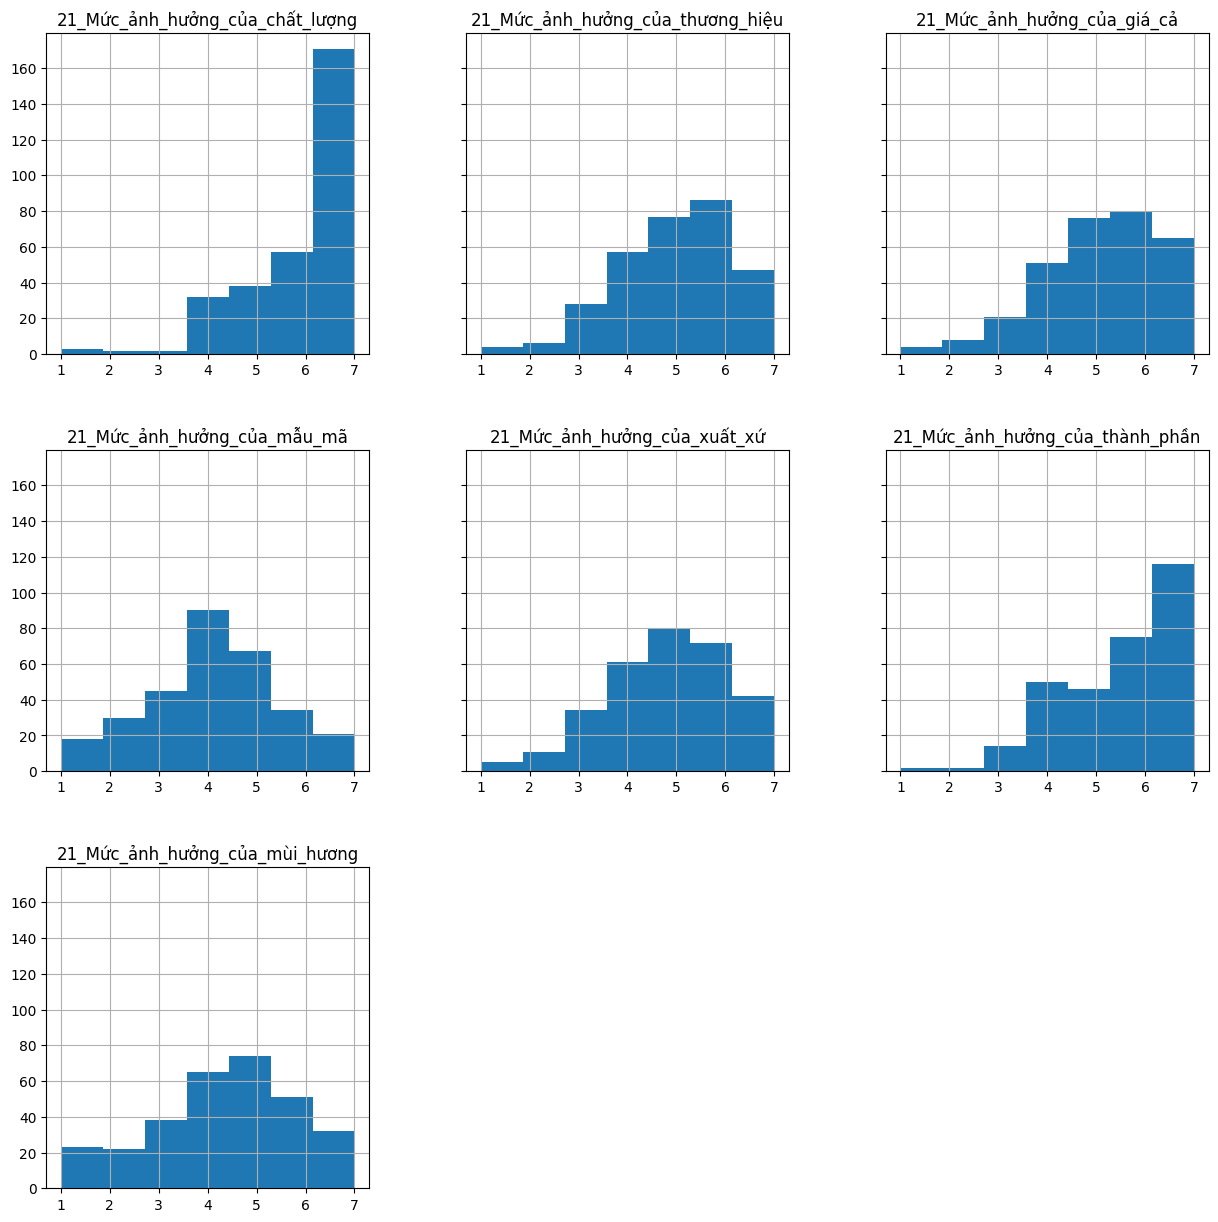

In [84]:

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15) , sharey=True) 
# Lấy bin =7 và lấy các cột có tên bắt đầu bằng 21_ là 7 cột nên axes.ravel()[:7]
survey_df[numeric_col_profile.columns].hist(bins=7, ax=axes.ravel()[:7] , grid=True)
# Xóa 2 biểu đồ không dùng tới
axes[2,1].axis('off')
axes[2,2].axis('off')

- According to the above distributions, what factors do the survey participants care about when buying facial cleanser? Why?

    **TODO**: ...
    - Từ biểu đồ rõ ràng thấy ràng Mức ảnh hưởng của chất lượng và **thành phần được quan tậm** nhiều nhất. Điều này cho thấy người dùng quan tâm đến chất lượng và thành phần của sản phẩm hơn cả. với bins số 7 là cao nhất, tức là người dùng quan tâm đến chất lượng và thành phần của sản phẩm rất nhiều.
    - Tiếp theo đó người dùng mới quan tâm đến giá cả và hương liệu và những tiêu chí còn lại

- This is a crucial insight since it offered data that may be used to plan marketing campaigns or the development of new product manufacturing plans.

- After handling numeric columns, you will handle categorical columns. Note that there are 2 type of survey questions:
    - Multiple choice, single answer: In this lab, it is not required to pre-process these columns.
    - Multiple choice, multiple answer: Have to pre-process.

- Here, you will work on the first one. You will perform these following steps:
    - Step #1: For each column, you have to compute the **number of different attributes** and a **dictionary** whose keys and values are attributes and number of each attribute, corresponding.
        - For example: In `Giới_tính`, we have the number of different attributes is 2 (`Nam` and `Nữ`). The dictionary is `{"Nữ": 244, "Nam": 61}` since there are 244 female participants and 61 male participants.
        - Save your result to a dataframe called `single_cate_profile`. The index column of dataframe is `["num_diff_vals", "distribution"]` and column names are similar to the name of categorical columns.
    - Step #2: Visualize the distribution using pie chart. You can use `for` loop to draw the charts.

In [85]:
single_answer_cols = ['Giới_tính', '2_Loại_da', '3_Tuần_suất_1ngày', '7_Chiết_xuất', '8_Srm_đang_sd', '9_Srm_có_mùi_hương?', '10_Dung_tích', '11_Số_lượng_mua', '12_Chi_tiền_cho_150ml', '13_Tiêu_chí_chọn_srm', '14_Ai_tư_vấn', '18_Tiêu_chí_mua_offline', '19_Tiêu_chí_mua_online', '22_Dùng_thử?', '23_Kỳ_vọng']
df = survey_df[single_answer_cols]

# TODO: code step 1
num_diff_vals = df.nunique()
# sử dụng hàm .agg() để tính số lượng các giá trị khác nhau của mỗi cột.
# Hàm .agg() nhận vào một hàm, hàm này sẽ được áp dụng cho mỗi cột của dataframe.
distribution = df.agg(lambda x: x.value_counts().to_dict())

# Nối 2 series thành 1 dataframe
single_cate_profile = pd.DataFrame({'num_diff_vals': num_diff_vals, 'distribution': distribution}).T

single_cate_profile

,Giới_tính,2_Loại_da,3_Tuần_suất_1ngày,7_Chiết_xuất,8_Srm_đang_sd,9_Srm_có_mùi_hương?,10_Dung_tích,11_Số_lượng_mua,12_Chi_tiền_cho_150ml,13_Tiêu_chí_chọn_srm,14_Ai_tư_vấn,18_Tiêu_chí_mua_offline,19_Tiêu_chí_mua_online,22_Dùng_thử?,23_Kỳ_vọng
num_diff_vals,2,6,4,2,4,2,4,3,4,6,5,5,5,3,5
distribution,"{'Nữ': 244, 'Nam': 61}","{'Da hỗn hợp': 98, 'Da dầu': 93, 'Da khô': 45,...","{'2 lần/ngày': 191, '1 lần/ngày': 76, 'Ít hơn ...","{'Chiết xuất từ các hoạt chất hóa học': 160, '...","{'Dạng gel': 199, 'Dạng bọt': 39, 'Dạng kem': ...","{'Có': 166, 'Không': 139}","{'Trên 150 ml - 300 ml': 168, '50 ml - 150 ml'...","{'Từ 1-2 sản phẩm/1 lần mua': 273, 'Từ 3-5 sản...","{'Từ 100.000 vnđ - 200.000 vnđ/150 ml': 203, '...","{'Thành phần': 193, 'Xuất xứ': 50, 'Giá cả': 4...","{'Review từ KOL, beauty blogger, người nổi tiế...","{'Uy tín của cửa hàng': 157, 'Nguồn thông tin ...","{'Đánh giá từ những người đã mua': 144, 'Nguồn...","{'Chưa biết': 204, 'Có': 84, 'Không': 17}","{'Sản phẩm chuyên sâu với hiệu quả cao': 138, ..."


In [86]:
# TEST
assert dict(single_cate_profile['Giới_tính']) == {'num_diff_vals': 2, 'distribution': {'Nữ': 244, 'Nam': 61}}
assert dict(single_cate_profile['13_Tiêu_chí_chọn_srm']) == {'num_diff_vals': 6, 'distribution': {'Thành phần': 193, 'Xuất xứ': 50, 'Giá cả': 44, 'Thể tích, dung tích': 9,'Mùi hương': 7,'Bao bì': 2}}

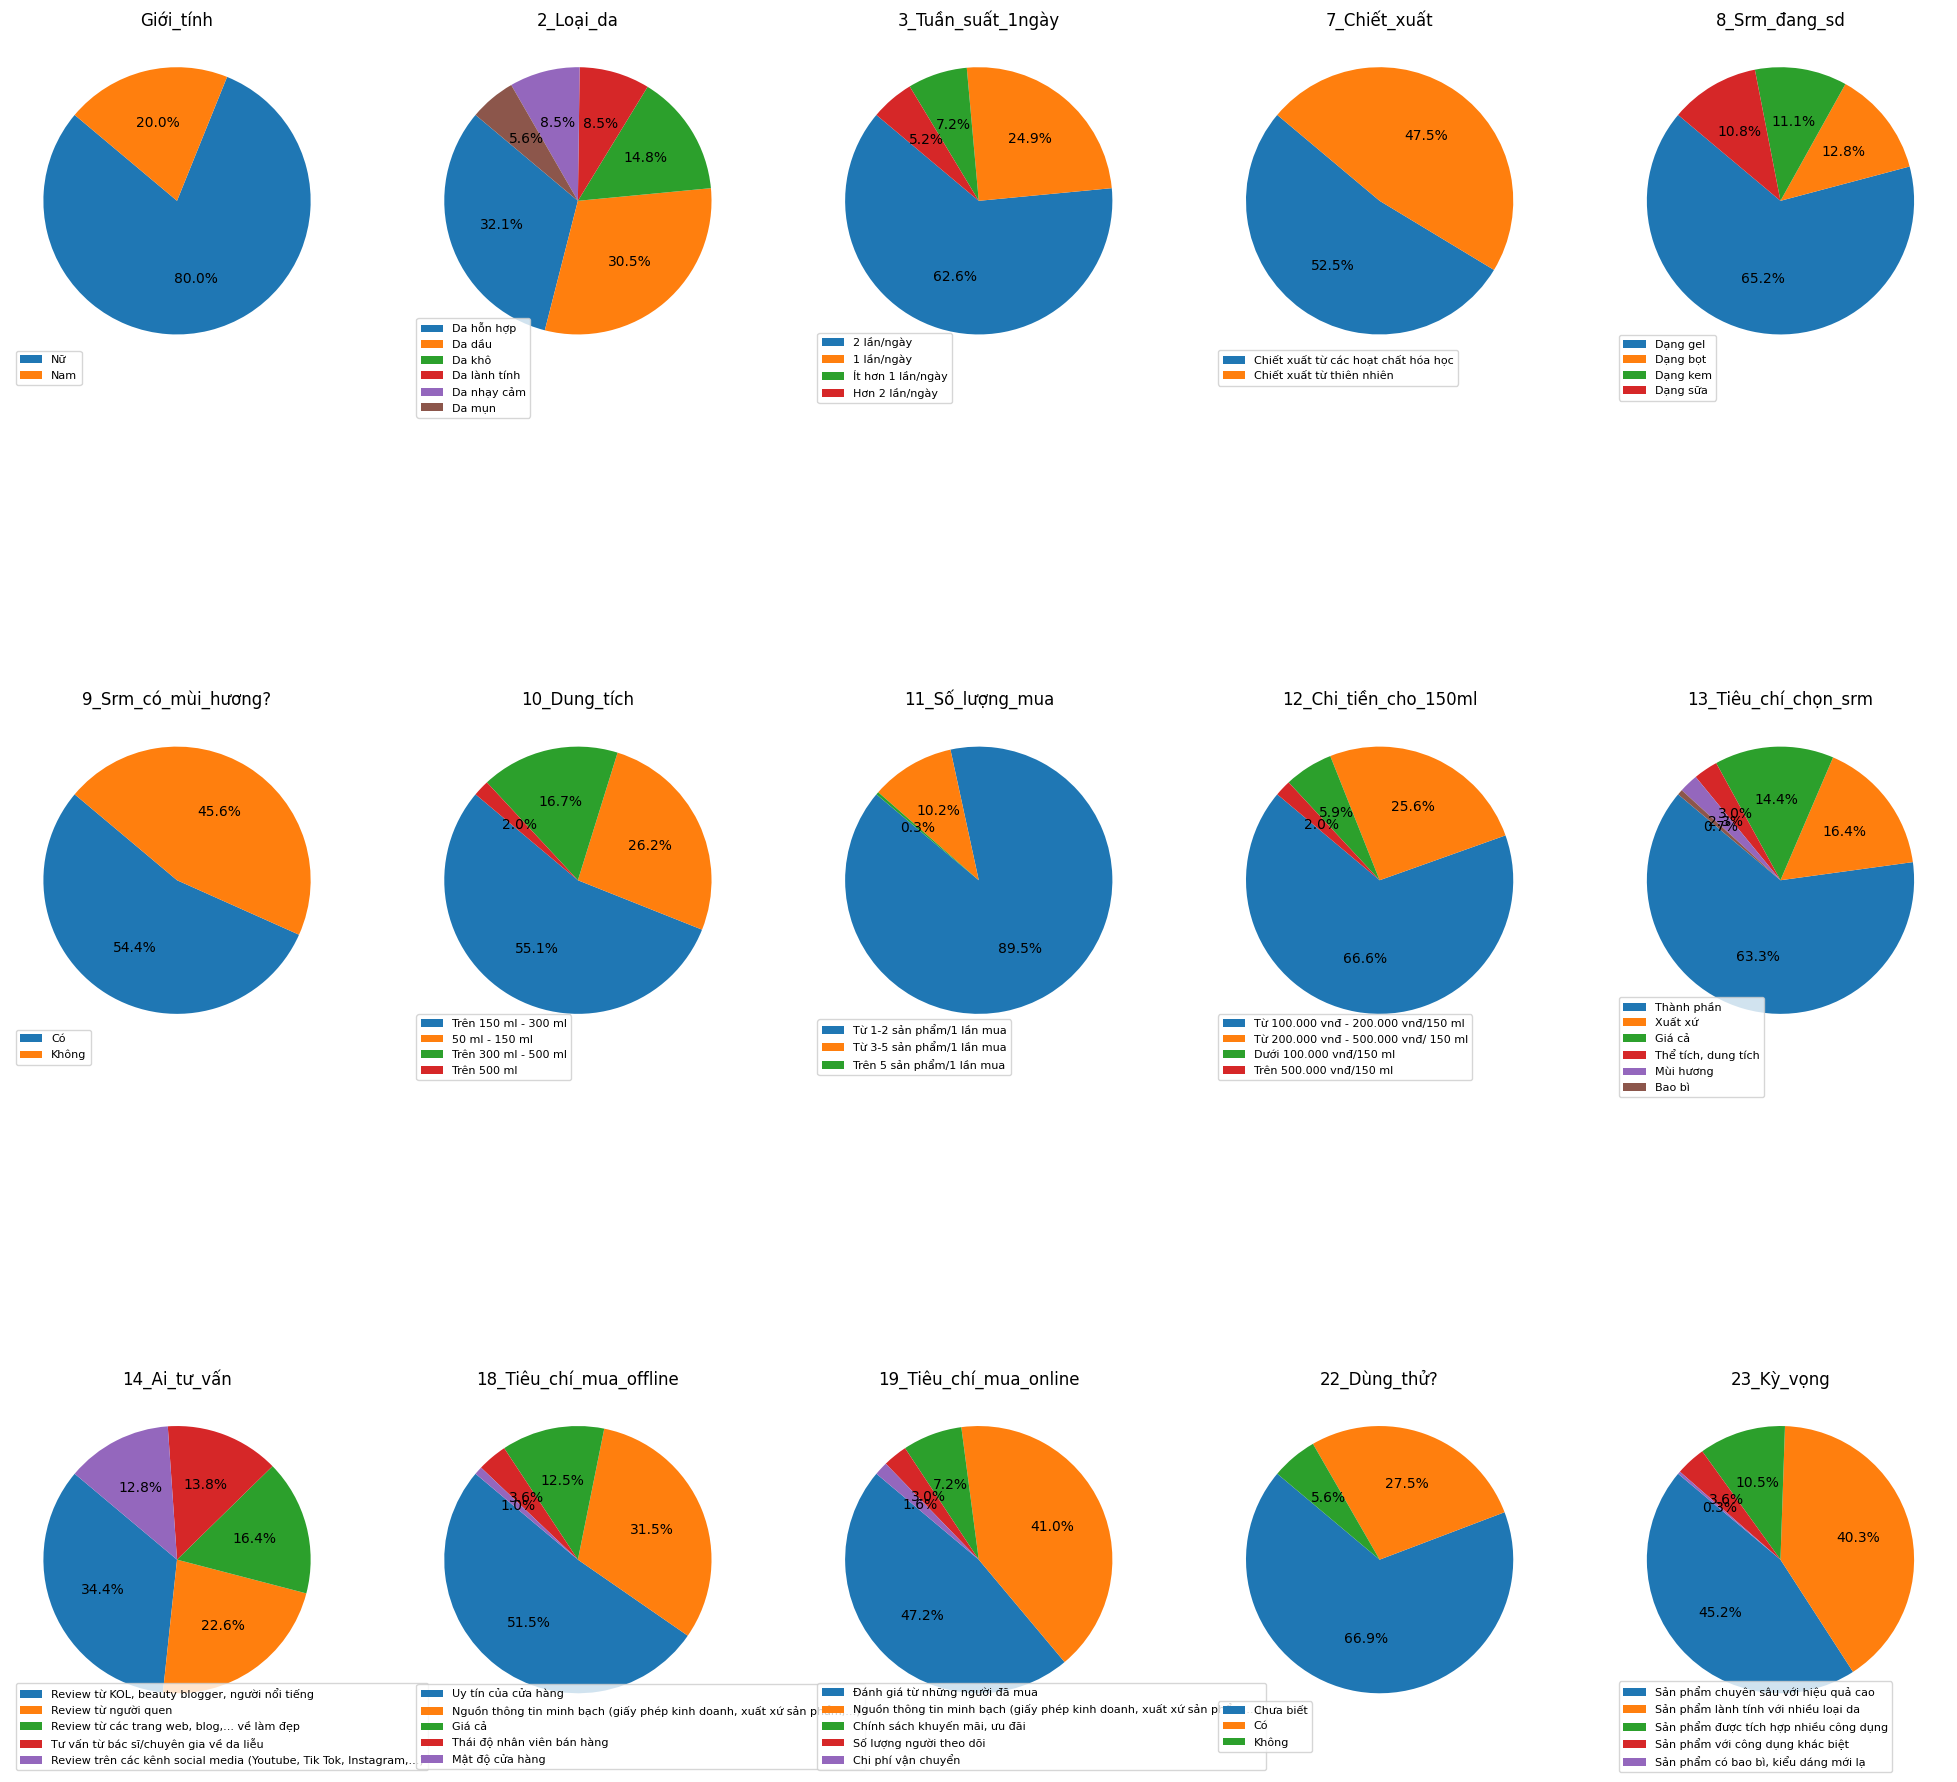

In [87]:
# TODO: code step 2

n_rows = 3
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 25))  

for ax, (column, data) in zip(axes.flatten(), single_cate_profile.items()):
    labels = data['distribution'].keys()
    sizes = data['distribution'].values()
    ax.pie(sizes, autopct='%1.1f%%', startangle=140)
    # chỉnh kích thước legend về vị trí góc trái
    ax.legend(labels, loc="center left", bbox_to_anchor=(0,0), prop={'size': 8})
    ax.set_title(column)
    
plt.show()

- Look at the above charts, you can gain some information about the distribution of categorical columns with single answer. For example, you can easily point out that most of participants clean their face twice a day, buy the cleanser product according to the instructions of KOLs and beauty blogger,...
- This information will help you a lot in deciding what and how to buy a cleanser product.

- Next, we will compute the distribution of multiple answer columns. You also perform the following familiar steps:
    - Step #1: For each column, you have to compute the **number of different attributes** and a **dictionary** whose keys and values are attributes and number of each attribute, corresponding. Save your result to a dataframe called `multiple_cate_profile`. Note that in columns `'91_*', '92_*', '93_*'`, there are user-defined values, which are recorded from `Mục khác`. You have to replace these values with `Khác` (you can use `apply` for replacing). For example, column `91_Thích_hương_trái_cây?` has 8 original values (see `./form.pdf`). The rest values will be replace with `Khác`.
    - Step #2: Visualize the 5 values with the highest frequency of occurrence using bar chart. You can use `for` loop to draw the charts.

- Note that do not touch the `df` since it will be used to check your answer.

In [88]:
multi_answer_cols = ['1_Mục_đích_sd_srm','4_Sd_khi_nào','5_Mua_ở_đâu','6_Quảng_cáo_ở_đâu','91_Thích_hương_trái_cây?','92_Thích_hương_rau_củ?','93_Thích_hương_hoa_cỏ?','15_Xuất_xứ','16_Mua_online_ở_đâu','17_Mua_offline_ở_đâu','20_Lo_ngại_về_srm']
df = survey_df[multi_answer_cols]

# TODO: code step 1
# Định nghĩa các giá trị gốc lấy từ form.pdf
original_vals_91 = ('Dâu', 'Táo', 'Mâm xôi', 'Cherry', 'Việt quất', 'Đào', 'Cam', 'Chanh')
original_vals_92 = ('Dưa leo', 'Thảo mộc', 'Nha đam', 'Rau má', 'Cà chua', 'Cần tây')
original_vals_93 = (  'Lavender', 'Hoa hồng', 'Anh đào','Trà xanh', 'Hoa sứ', 'Hoa cúc')
original_vals_dict = {
    '91_Thích_hương_trái_cây?': original_vals_91,
    '92_Thích_hương_rau_củ?': original_vals_92,
    '93_Thích_hương_hoa_cỏ?': original_vals_93
}
multiple_cate_profile = pd.DataFrame()


def split_values(series):
    col_name = series.name
    new_series = (
        series.str.replace(r', $', '', regex=True) # Xóa dấu , cuối cùng
        .str.replace('?', '', regex=False)  # xóa ký tự thừa
        .dropna()  # Không xet những cột Nan
        .str.split(',')  # Tách nhau bởi dấu ,
        .explode()  # Chuyển từng list thành hàng riêng biệt
        .str.strip()  # Xóa khoảng trắng
        )

    if col_name in original_vals_dict:
        original_values = original_vals_dict[col_name]
        # Thay thế các giá trị không nằm trong original_values bằng 'Khác'
        new_series = new_series.where(new_series.isin(original_values), 'Khác')
    return new_series.explode() # Chuyển từ danh sách sang các hàng riêng biệt


# Dùng .agg() để áp dụng cho từng cột
multiple_cate_profile['num_diff_vals'] = df.agg(lambda x: split_values(x).nunique()) 
multiple_cate_profile['distribution'] = df.agg(lambda x: split_values(x).value_counts().to_dict())


multiple_cate_profile = pd.DataFrame(multiple_cate_profile.T)
multiple_cate_profile

,1_Mục_đích_sd_srm,4_Sd_khi_nào,5_Mua_ở_đâu,6_Quảng_cáo_ở_đâu,91_Thích_hương_trái_cây?,92_Thích_hương_rau_củ?,93_Thích_hương_hoa_cỏ?,15_Xuất_xứ,16_Mua_online_ở_đâu,17_Mua_offline_ở_đâu,20_Lo_ngại_về_srm
num_diff_vals,7,5,9,8,9,7,7,11,3,6,4
distribution,{'Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...':...,"{'Trước khi đi ngủ': 242, 'Sau khi thức dậy': ...","{'Các sàn thương mại điện tử': 213, 'Các cửa h...","{'Truyền thông; quảng cáo': 205, 'Tự tìm hiểu'...","{'Đào': 61, 'Táo': 44, 'Cam': 39, 'Cherry': 36...","{'Nha đam': 114, 'Thảo mộc': 72, 'Rau má': 47,...","{'Trà xanh': 92, 'Hoa hồng': 71, 'Lavender': 6...","{'Hàn Quốc': 184, 'Nhật Bản': 111, 'Mỹ': 100, ...","{'Sàn thương mại điện tử': 253, 'Website của h...","{'Các cửa hàng mỹ phẩm': 198, 'Cửa hàng chính ...","{'Hàng giả; hàng nhái': 216, 'Tác dụng phụ; gâ..."


In [89]:
# TEST
assert list(multiple_cate_profile.to_numpy()[0]) == [7, 5, 9, 8, 9, 7, 7, 11, 3, 6, 4]
assert dict(multiple_cate_profile['20_Lo_ngại_về_srm']) == {'num_diff_vals': 4, 'distribution': {'Hàng giả; hàng nhái': 216, 'Tác dụng phụ; gây kích ứng; bong tróc da': 141, 'Sản phẩm không có nguồn gốc rõ ràng': 104, 'Không có hiệu quả hoặc hiệu quả kém': 44}}
assert dict(multiple_cate_profile['91_Thích_hương_trái_cây?']) == {'num_diff_vals': 9, 'distribution': {'Đào': 61, 'Táo': 44, 'Cam': 39, 'Cherry': 36, 'Chanh': 34, 'Dâu': 34, 'Việt quất': 33, 'Khác': 13, 'Mâm xôi': 11}}
assert dict(multiple_cate_profile['92_Thích_hương_rau_củ?']) == {'num_diff_vals': 7, 'distribution': {'Nha đam': 114, 'Thảo mộc': 72, 'Rau má': 47, 'Dưa leo': 35, 'Cà chua': 20, 'Cần tây': 5, 'Khác': 4}}
assert dict(multiple_cate_profile['93_Thích_hương_hoa_cỏ?']) == {'num_diff_vals': 7, 'distribution': {'Trà xanh': 92, 'Hoa hồng': 71, 'Lavender': 68, 'Anh đào': 49, 'Hoa cúc': 20, 'Hoa sứ': 7, 'Khác': 3}}

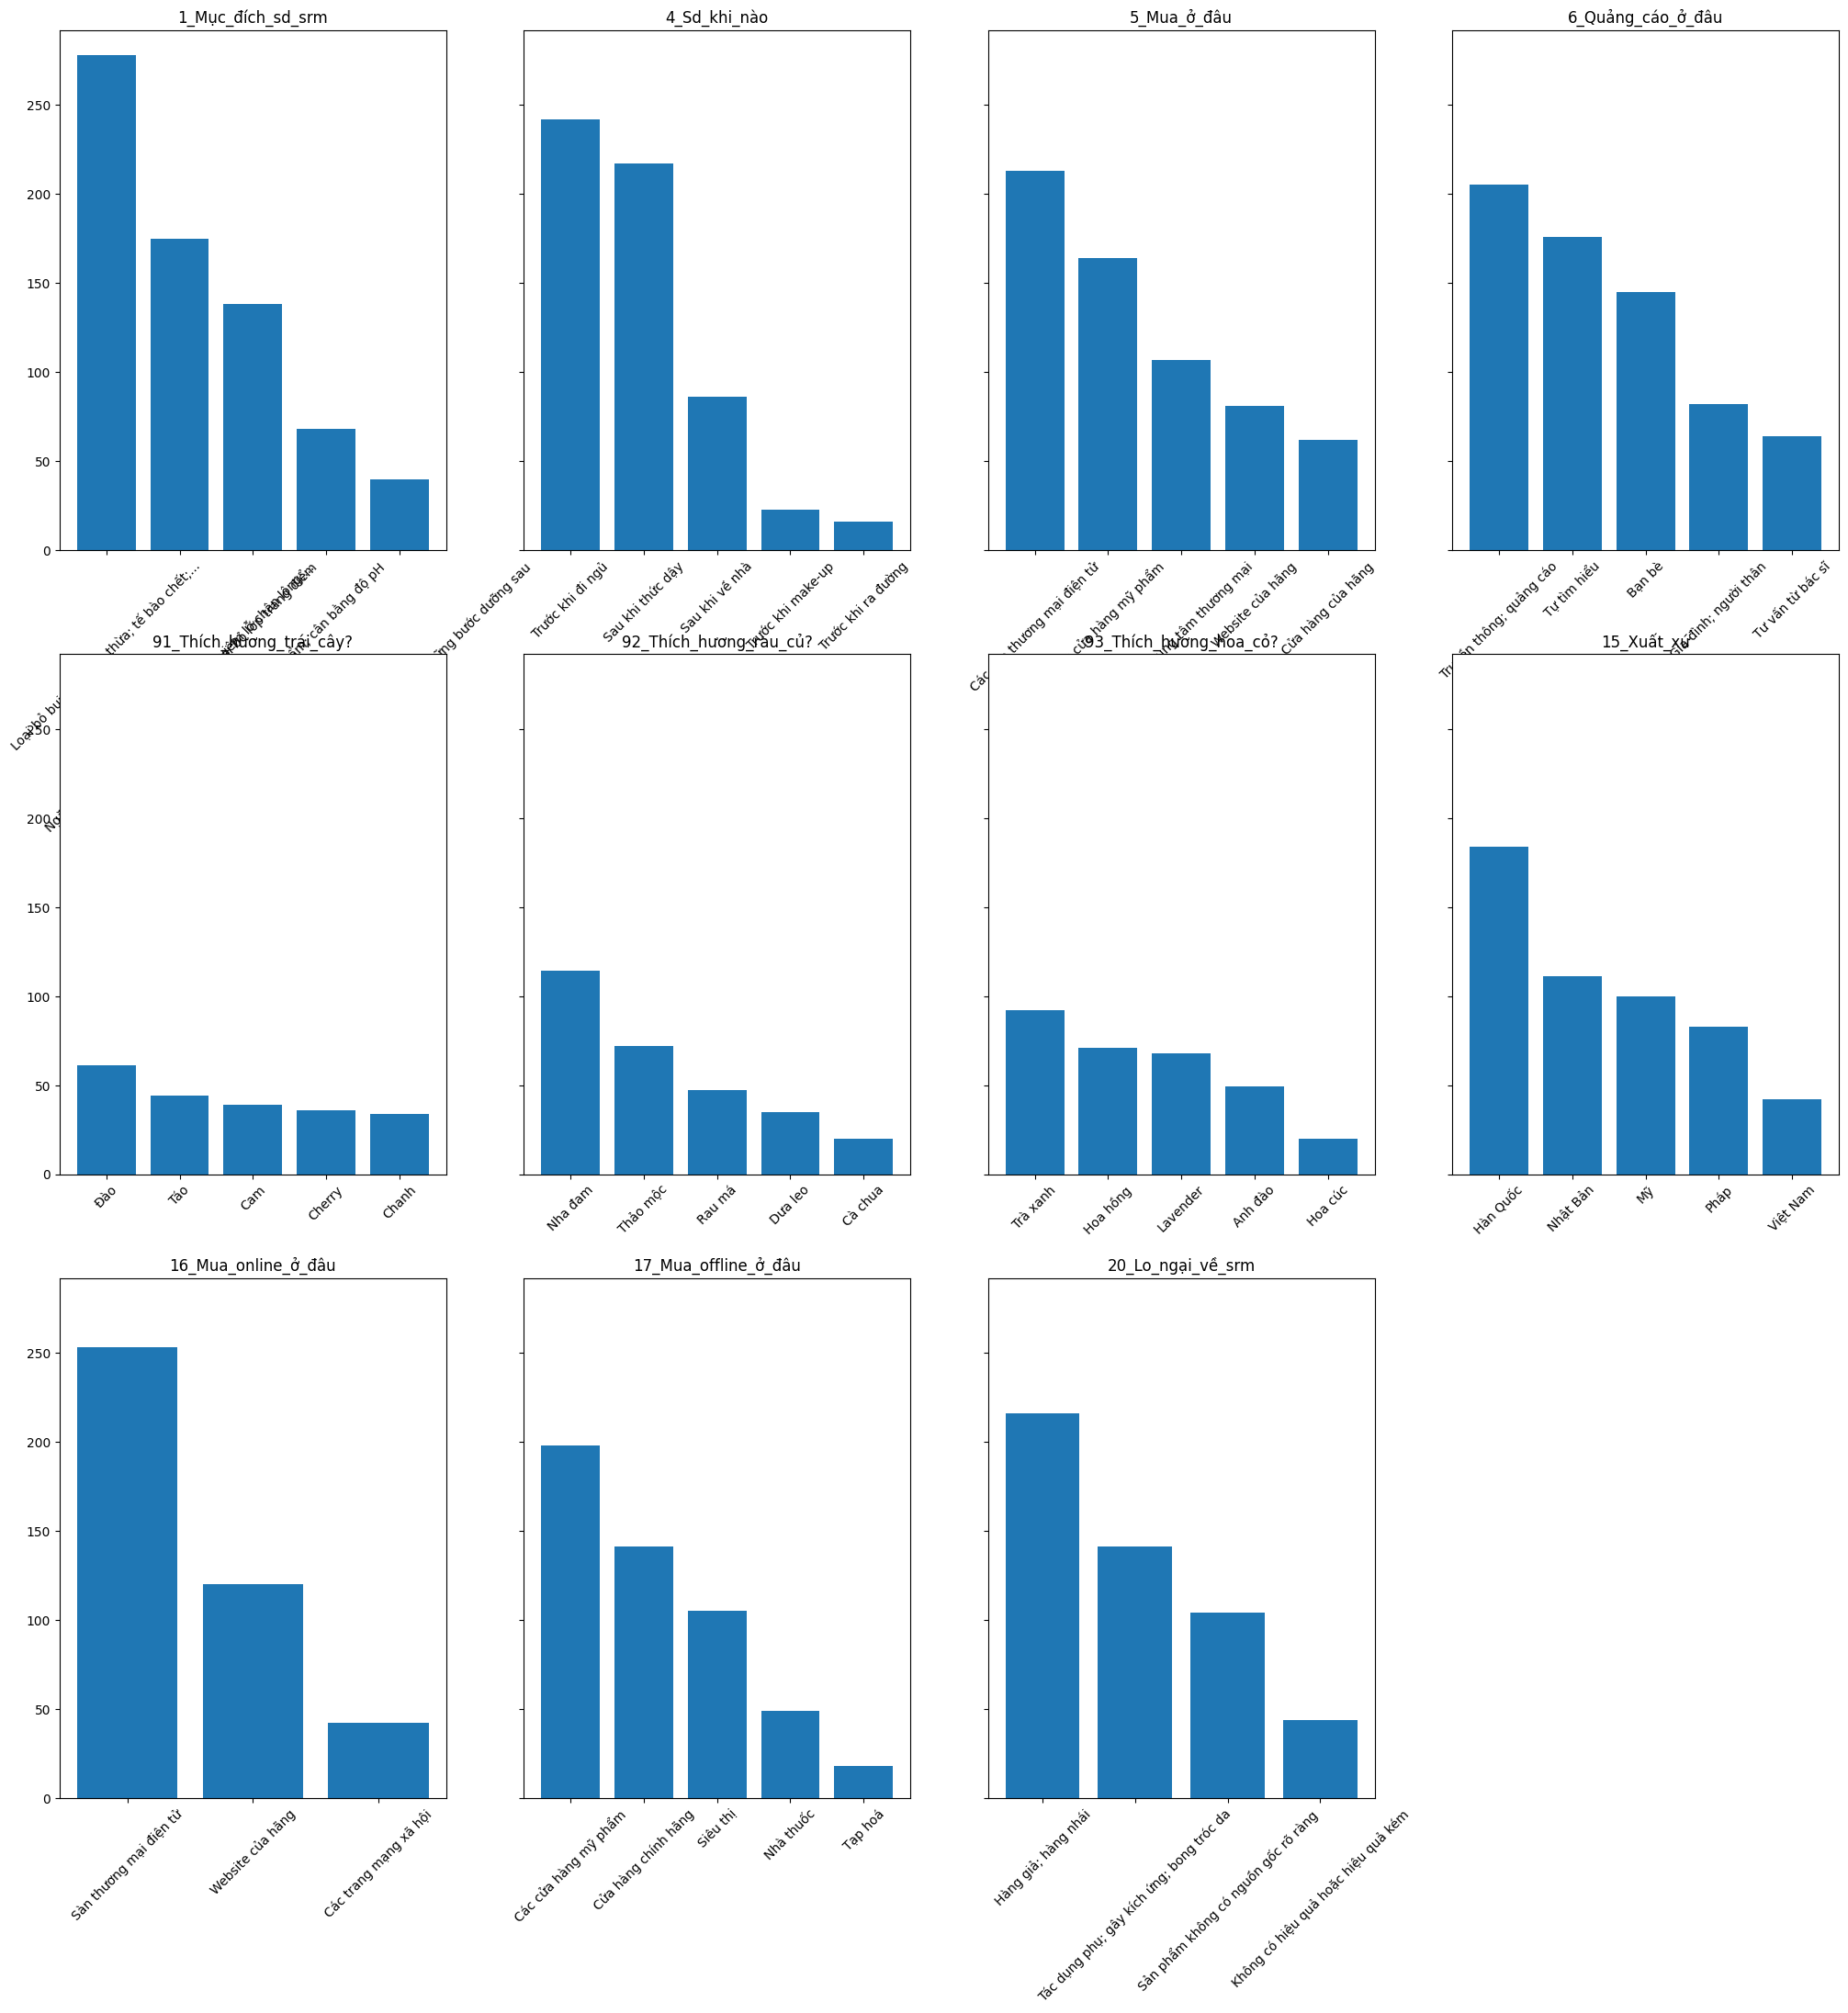

In [90]:
# TODO: code step 2
n_rows = 3
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 25), sharey=True)  
for ax, (column, data) in zip(axes.flatten(), multiple_cate_profile.items()):

    # Chuyển đổi từ điển 'distribution' thành một pandas Series
    distribution = pd.Series(data['distribution'])

    # Lấy ra top 5 keys với value lớn nhất
    top_5 = distribution.nlargest(5)

    # Lấy ra labels và sizes
    labels = top_5.index.tolist()
    sizes = top_5.values.tolist()
    
    # Vẽ biểu đồ cột
    ax.bar(labels, sizes)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_title(column)
# Ẩn các axes còn lại

axes.flatten()[11].axis('off')   
plt.show()

- Finally, you will perform **one-hot encoding** on categorical columns. One-hot encoding is a popular pre-processing method for categorical data. What is one-hot encoding? What does it use for?

    - Chuyển đổi biến phân loại thành biến nhị phân: Mỗi cột mới này đại diện cho một danh mục cụ thể trong biến ban đầu, và mỗi hàng trong cột này sẽ có giá trị 1 (nếu danh mục đó xuất hiện) hoặc 0 (nếu không).
    - Sử dụng encoding được sử dụng cho:
      1. Tương thích với Thuật toán Học Máy: Nhiều thuật toán học máy yêu cầu dữ liệu đầu vào dưới dạng số. Biến phân loại thường không phải là số và không thể xử lý trực tiếp bởi các thuật toán này. One-hot encoding giúp chuyển đổi các biến phân loại này thành dạng số mà thuật toán có thể "hiểu" được.
      2. Dễ dàng Mở rộng: Phương pháp này dễ dàng mở rộng để xử lý các biến phân loại với bất kỳ số lượng danh mục nào.


- Since performing one-hot encoding on single answer columns is quite easy, you will perform this technique on multiple answer columns. In this part, you can use `for` loop to loop through the column and pre-process them. However, it would be better if you don't use loop for this task. The final dataframe is save to `one_hot_df`

- Note that do not touch the `df` since it will be used to check your answer.

In [91]:
# TODO: perform one-hot encoding on multiple_answer_cols
from sklearn.preprocessing import OneHotEncoder

# Tạo một OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

def preprocessing(series):
    # Loại bỏ ký tự thừa và dấu phẩy cuối cùng
    cleaned_series = series.str.replace(r',\s*$', '', regex=True) \
                            .str.replace('?', '', regex=False) \
                            .dropna()

    # Tách chuỗi bằng dấu phẩy và loại bỏ khoảng trắng
    split_series = cleaned_series.str.split(',\s*').explode()

    # Xử lý những cột đặc biệt
    if series.name in original_vals_dict:
        original_values = original_vals_dict[series.name]
        # Lấy nhúng giá trị không trong original_values
        mask = ~split_series.isin(original_values)
        # Thay thế các giá trị không nằm trong original_values bằng 'Khác'
        split_series[mask] = 'Khác'

    # Nối lại các giá trị thành chuỗi, nhóm theo index gốc
    return split_series.groupby(level=0).agg(', '.join)

# Hàm tiền xử lý one-hot encoding dùng sklearn's OneHotEncoder
def sklearn_one_hot_encode(series):
    # Xử lý dữ liệu trước khi one-hot encoding
    s = series.dropna().str.split(', ').explode()
    s.name = series.name
    encoded_data = encoder.fit_transform(s.to_frame())

    # Tạo một DataFrame mới từ ma trận one-hot encoding, đặt tên cột là tên các giá trị ban đầu nối với những giá trị distribution
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(), index=s.index)
    # Gom nhóm các hàng trùng lặp
    encoded_df = encoded_df.groupby(encoded_df.index).max()
    return encoded_df

one_hot_df = pd.DataFrame()
# Tiền xử lý dữ liệu trước khi one-hot encoding
new_df = df.agg(lambda x: preprocessing(x))

for col in new_df.columns:
    # Thêm các cột one-hot encoding vào one_hot_df
    one_hot_df = pd.concat([one_hot_df, sklearn_one_hot_encode(new_df[col])], axis=1)

# Điền những ô không có dữ liệu bằng 0 và chuyển về kiểu số nguyên
one_hot_df = one_hot_df.fillna(0).astype(int)

one_hot_df



,1_Mục_đích_sd_srm_Cấp ẩm; cân bằng độ pH,1_Mục_đích_sd_srm_Giúp loại bỏ lớp trang điểm,1_Mục_đích_sd_srm_Hỗ trợ da căng bóng,1_Mục_đích_sd_srm_Hỗ trợ da hấp thu dưỡng chất cho những bước dưỡng sau,1_Mục_đích_sd_srm_Hỗ trợ làm trắng da,1_Mục_đích_sd_srm_Loại bỏ bụi bẩn; dầu thừa; tế bào chết;...,1_Mục_đích_sd_srm_Ngăn ngừa các bệnh về da như: mụn; viêm lỗ chân lông;...,4_Sd_khi_nào_Sau khi thức dậy,4_Sd_khi_nào_Sau khi về nhà,4_Sd_khi_nào_Trước khi make-up,...,17_Mua_offline_ở_đâu_Các cửa hàng mỹ phẩm,17_Mua_offline_ở_đâu_Cửa hàng chính hãng,17_Mua_offline_ở_đâu_Cửa hàng tiện lợi,17_Mua_offline_ở_đâu_Nhà thuốc,17_Mua_offline_ở_đâu_Siêu thị,17_Mua_offline_ở_đâu_Tạp hoá,20_Lo_ngại_về_srm_Hàng giả; hàng nhái,20_Lo_ngại_về_srm_Không có hiệu quả hoặc hiệu quả kém,20_Lo_ngại_về_srm_Sản phẩm không có nguồn gốc rõ ràng,20_Lo_ngại_về_srm_Tác dụng phụ; gây kích ứng; bong tróc da
0,0,1,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,0,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,1,0,0,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,1,0,1,0
4,1,0,0,0,0,1,1,1,0,0,...,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
331,0,0,0,0,0,1,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
332,1,0,1,0,0,0,1,0,1,0,...,1,1,1,1,1,1,1,0,1,0
334,1,0,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0


In [92]:
# TEST
for i in range(len(df)):
    if i != 7 and i != 168:
        assert sum(one_hot_df.iloc[i]) == sum([len(item.split(', ')) if item is not np.nan else 0 for item in df.iloc[i]])

- What does the test mean? In the test, why don't I test the row #7 and #168?

    **TODO** (OPTIONAL): ...
    - Trong hàng thứ  7 có cột '91_*' có câu trả lời là: 'Trà xanh, tràm trà, bạc hà'. Cả 3 giá trị không năng trong original value nền đều bị thay thế bằng khác. và sau khi qua one-hot encoding thì cột '91_*Khác'  chỉ đánh giá trị là 1 tức là user có chọn ô Khác chứ không thể thể hiện là user đã điền 3 giá trị khác vào. Do đó khi split bằng dấu ',' thì sẽ chênh lệch 2 giá trị so với với sum(). (24 và 26)
    - Trong hàng 168 có cột '92_*' có câu trả lời là: 'Thảo mộc, '. ở đây có một dấu phẩy thừa nên khi split sẽ chênh lệch một giá trị so với sum().  
    => Dữ liệu thực tế luôn có nhiều kiểu. Ta luôn phải tiền xử lý chúng trước khi làm các bước phân tích chuyên sâu vào dữ liệu.

## 4. Question proposing & Answering

- In this section, you are going to answer my 2 questions and prose 1 question. Note that these questions can all be answered by analyzing data. Theoretically, the proposed question have to benefit at a certain level. But this is exercise about `Pandas`, my questions can be aimed more at technical side than the meaningful side. But your question has to be meaningful :v

### 4.0. What is the difference in scent preference when choosing a facial cleanser between male and female participants?

- In order to answer this question, You have to compare the choice of scent between male and female participants. Group bar chart might be a good option to do so.
- First, you have to filter needed columns (`'91_*', '92_*', '93_*'`) from `one_hot_df` and place them in a new dataframe call `scent_df`. You can use `for` loop to get the column names if needed.
- Then, group by `Giới_tính` to find out the distribution of scent for each gender. Save the result to `distribution_91, distribution_92, distribution_93`. You can observe the `distribution_91` in the cell code below.
- Visualize the result in a group bar chart. Groups are scents. In each group, there will be 2 columns (`Nam` and `Nữ`)

In [93]:
# TODO: answer the question
# Thêm 1 cột giới tính vào one_hot_df và xử lý như single_answer_cols
mask = one_hot_df.columns.str.startswith('91_') | one_hot_df.columns.str.startswith('92_') | one_hot_df.columns.str.startswith('93_')
scent_df = one_hot_df[one_hot_df.columns[mask]]

scent_df['Giới_tính'] = survey_df['Giới_tính'].replace({'Nam': 0, 'Nữ': 1})
# Thống kê số lượng nam và nữ ở các cột bắt đầu bằng '91_' 

mask_91 = scent_df.columns[scent_df.columns.str.startswith('91_')].append(pd.Index(['Giới_tính']))
mask_92 = scent_df.columns[scent_df.columns.str.startswith('92_')].append(pd.Index(['Giới_tính']))
mask_93 = scent_df.columns[scent_df.columns.str.startswith('93_')].append(pd.Index(['Giới_tính']))

distribution_91 = scent_df.loc[:, mask_91].groupby('Giới_tính').sum().rename(index={0: 'Nam', 1: 'Nữ'})
distribution_92 = scent_df.loc[:, mask_92].groupby('Giới_tính').sum().rename(index={0: 'Nam', 1: 'Nữ'})
distribution_93 = scent_df.loc[:, mask_93].groupby('Giới_tính').sum().rename(index={0: 'Nam', 1: 'Nữ'})
distribution_91

,91_Thích_hương_trái_cây?_Cam,91_Thích_hương_trái_cây?_Chanh,91_Thích_hương_trái_cây?_Cherry,91_Thích_hương_trái_cây?_Dâu,91_Thích_hương_trái_cây?_Khác,91_Thích_hương_trái_cây?_Mâm xôi,91_Thích_hương_trái_cây?_Táo,91_Thích_hương_trái_cây?_Việt quất,91_Thích_hương_trái_cây?_Đào
Giới_tính,,,,,,,,,
Nam,9,10,8,6,2,2,11,12,12
Nữ,30,24,28,28,9,9,33,21,49


In [94]:
# TEST
assert dict(distribution_91['91_Thích_hương_trái_cây?_Việt quất']) == {'Nam': 12, 'Nữ': 21}
assert dict(distribution_92['92_Thích_hương_rau_củ?_Cần tây']) == {'Nam': 2, 'Nữ': 3}
assert dict(distribution_93['93_Thích_hương_hoa_cỏ?_Anh đào']) == {'Nam': 7, 'Nữ': 42}

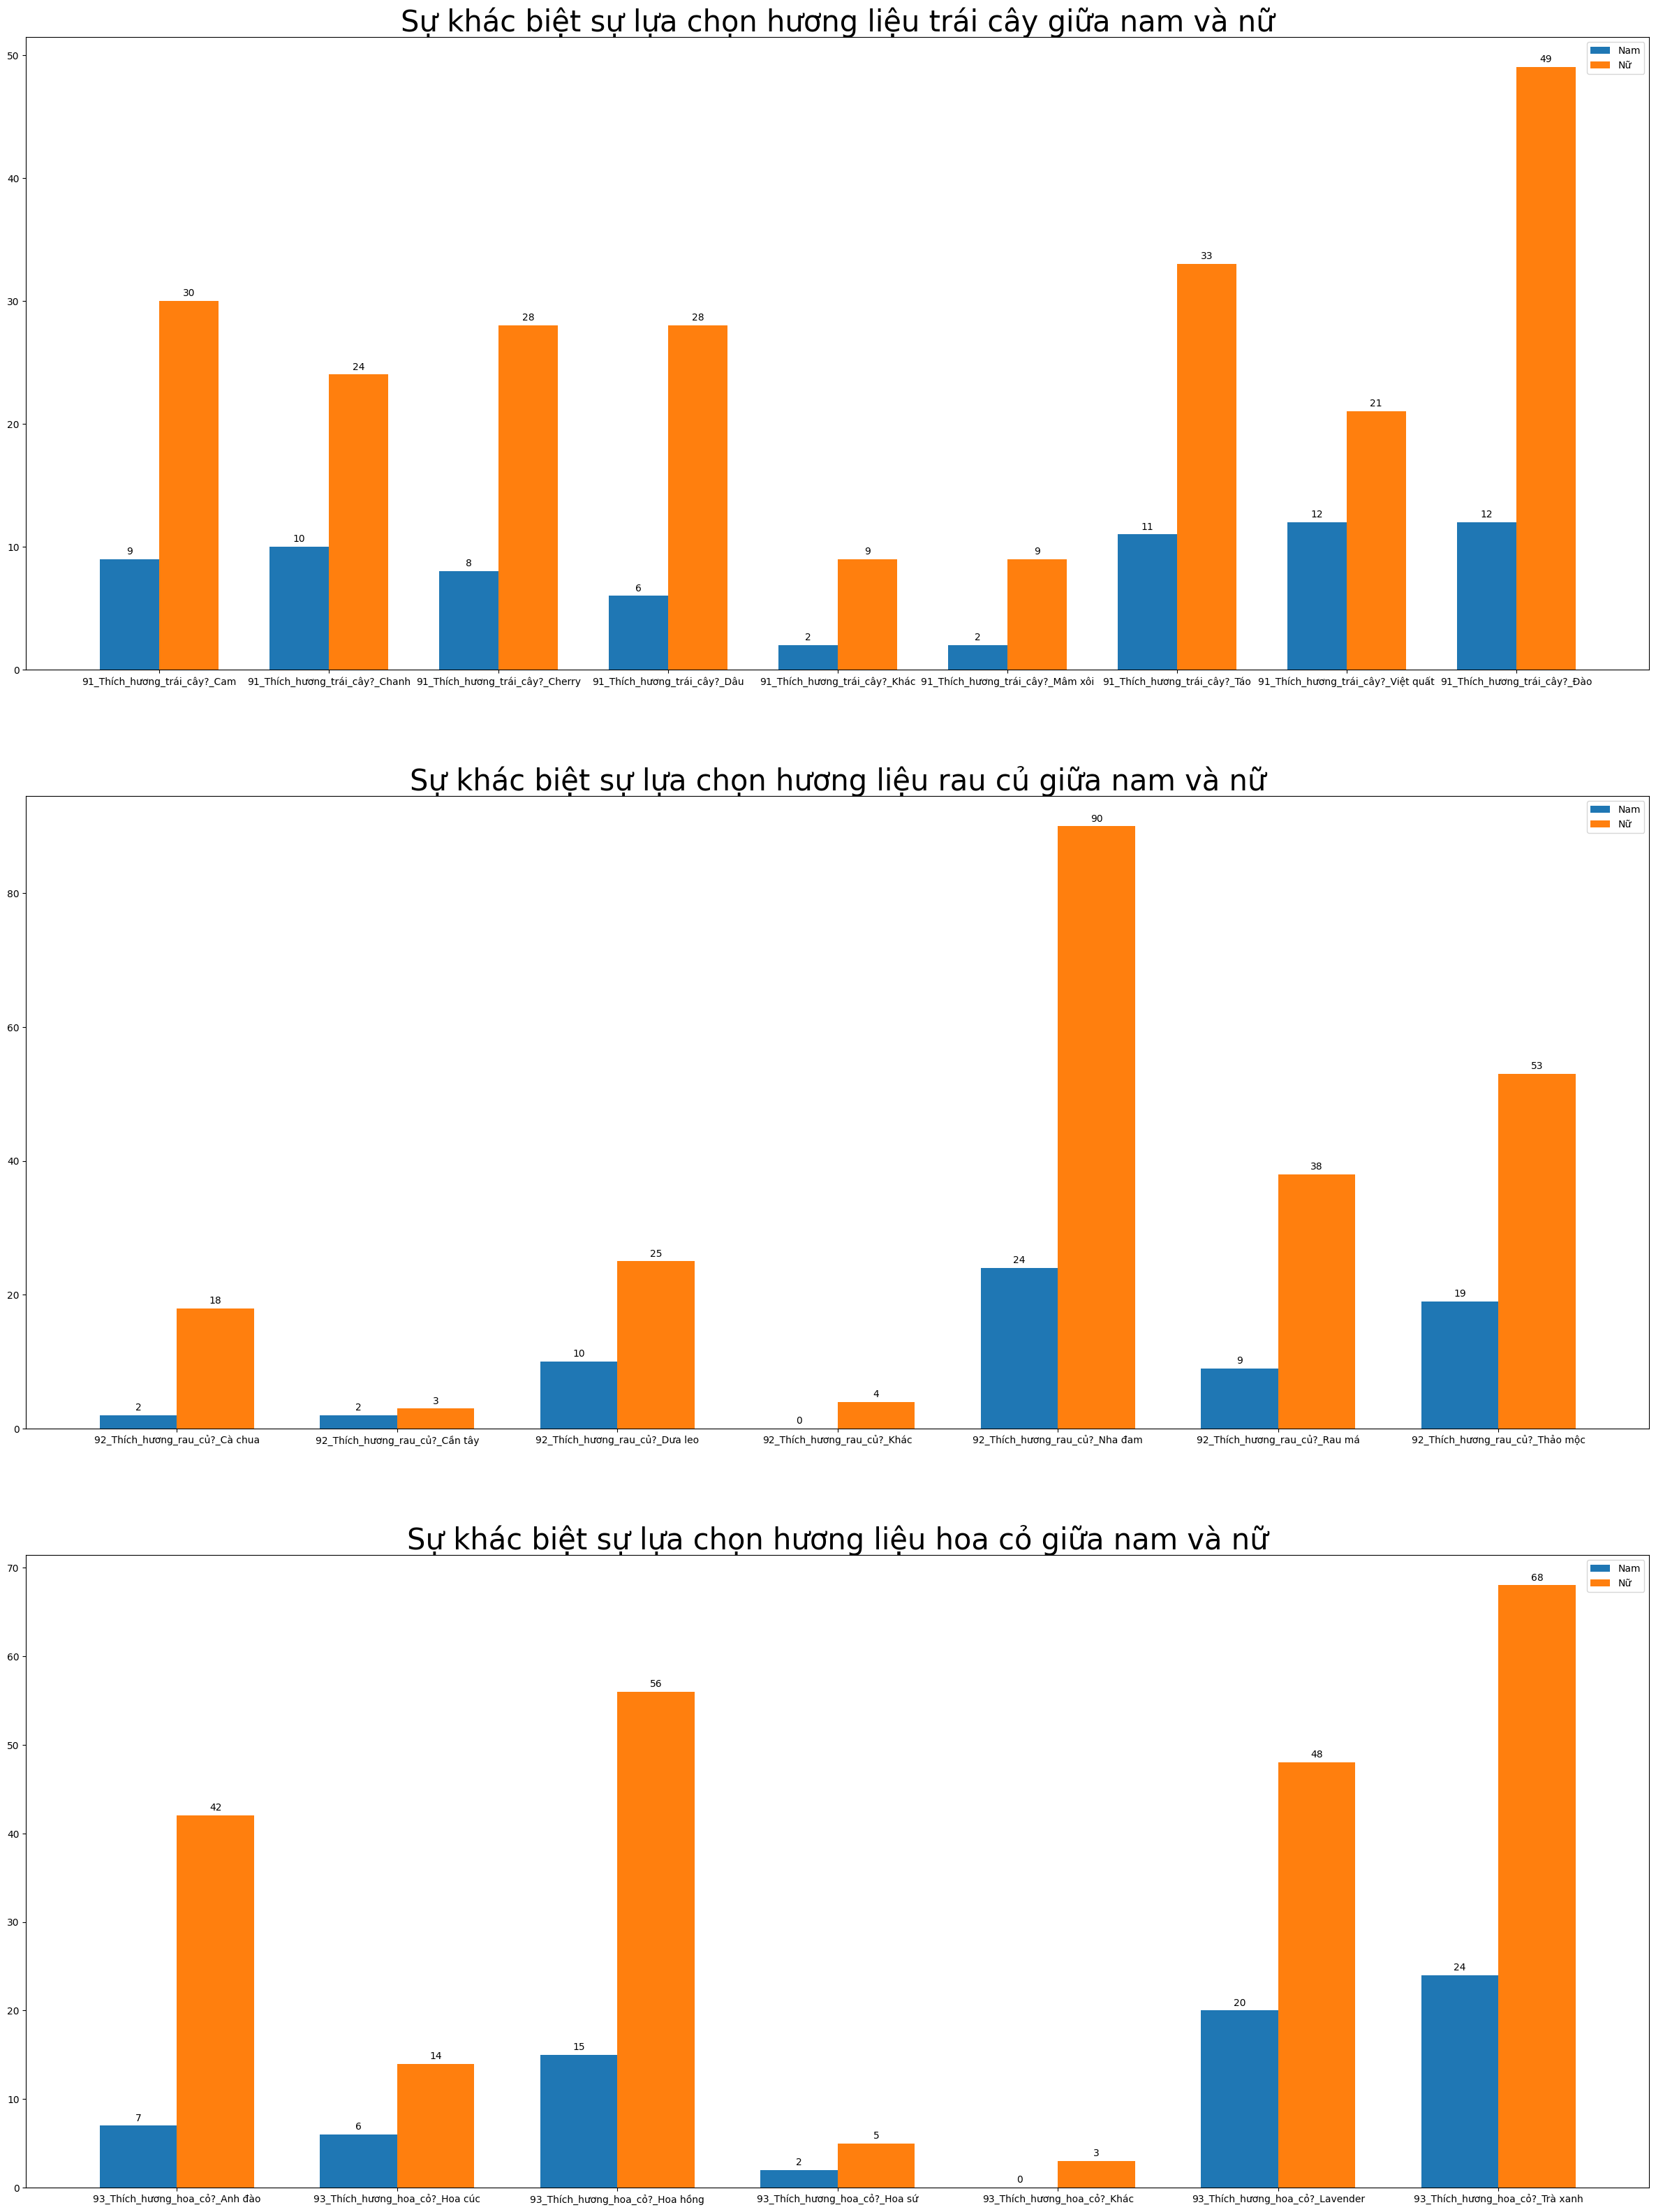

In [95]:
# TODO: Visualize 3 distribution. Your figure will look like the chart below

fig, ax = plt.subplots(3, 1, figsize=(30, 40))
# Vẽ trên bộ dữ liệu distribution_91
categories = distribution_91.columns
male_counts = distribution_91.iloc[0]  
female_counts = distribution_91.iloc[1]  

# Tạo vị trí cho mỗi nhóm cột
x = np.arange(len(categories))  
width = 0.35  # Chiều rộng của cột
# Vẽ biểu đồ
bars1 = ax[0].bar(x - width/2, male_counts, width, label='Nam')
bars2 = ax[0].bar(x + width/2, female_counts, width, label='Nữ')
# Thêm số lượng vào trên cột
ax[0].bar_label(bars1, padding=3)
ax[0].bar_label(bars2, padding=3)
# Thêm thông tin cho biểu đồ
ax[0].set_title('Sự khác biệt sự lựa chọn hương liệu trái cây giữa nam và nữ', fontsize=30)
ax[0].set_xticks(x )
ax[0].set_xticklabels(categories, fontsize=10)
ax[0].legend()


# Vẽ trên bộ dữ liệu  distibution_92
categories = distribution_92.columns
male_counts = distribution_92.iloc[0]  
female_counts = distribution_92.iloc[1]  

x = np.arange(len(categories))  
width = 0.35  

bars1 = ax[1].bar(x - width/2, male_counts, width, label='Nam')
bars2 = ax[1].bar(x + width/2, female_counts, width, label='Nữ')

ax[1].bar_label(bars1, padding=3)
ax[1].bar_label(bars2, padding=3)

ax[1].set_title('Sự khác biệt sự lựa chọn hương liệu rau củ giữa nam và nữ', fontsize=30)
ax[1].set_xticks(x )
ax[1].set_xticklabels(categories, fontsize=10)
ax[1].legend()

# Vẽ trên bộ dữ liệu distribution_93
categories = distribution_93.columns
male_counts = distribution_93.iloc[0]  
female_counts = distribution_93.iloc[1]  

x = np.arange(len(categories))  
width = 0.35  

bars1 = ax[2].bar(x - width/2, male_counts, width, label='Nam')
bars2 = ax[2].bar(x + width/2, female_counts, width, label='Nữ')

ax[2].bar_label(bars1, padding=3)
ax[2].bar_label(bars2, padding=3)

ax[2].set_title('Sự khác biệt sự lựa chọn hương liệu hoa cỏ giữa nam và nữ', fontsize=30)
ax[2].set_xticks(x )
ax[2].set_xticklabels(categories, fontsize=10)
ax[2].legend()
# Hiển thị biểu đồ
plt.show()

### 4.1. What is the most important factor when choosing a facial cleanser between male and female participants?

- Hint: See the question #22 in `./form.pdf`.
- This question can be answered in the same way as question 1 but it is much easier because the data is single answer data.
    - Save the distribution of male and female participants to 2 dictionaries named `male_factors` and `female_factors`
    - Then visualize the result as question 1

In [96]:
# TODO: answer the question
distribution_13 = survey_df.loc[:,['Giới_tính','13_Tiêu_chí_chọn_srm']]
male_factors = distribution_13.groupby('Giới_tính').get_group('Nam')['13_Tiêu_chí_chọn_srm'].value_counts().to_dict()
female_factors = distribution_13.groupby('Giới_tính').get_group('Nữ')['13_Tiêu_chí_chọn_srm'].value_counts().to_dict()
print(male_factors)
print(female_factors)

{'Thành phần': 32, 'Xuất xứ': 14, 'Giá cả': 10, 'Mùi hương': 2, 'Thể tích, dung tích': 2, 'Bao bì': 1}
{'Thành phần': 161, 'Xuất xứ': 36, 'Giá cả': 34, 'Thể tích, dung tích': 7, 'Mùi hương': 5, 'Bao bì': 1}


In [97]:
# TEST
assert male_factors == {'Thành phần': 32, 'Xuất xứ': 14, 'Giá cả': 10, 'Mùi hương': 2, 'Thể tích, dung tích': 2, 'Bao bì': 1}
assert female_factors == {'Thành phần': 161, 'Xuất xứ': 36, 'Giá cả': 34, 'Thể tích, dung tích': 7, 'Mùi hương': 5, 'Bao bì': 1}

     Thành phần  Xuất xứ  Giá cả  Mùi hương  Thể tích, dung tích  Bao bì
Nam          32       14      10          2                    2       1
Nữ          161       36      34          5                    7       1


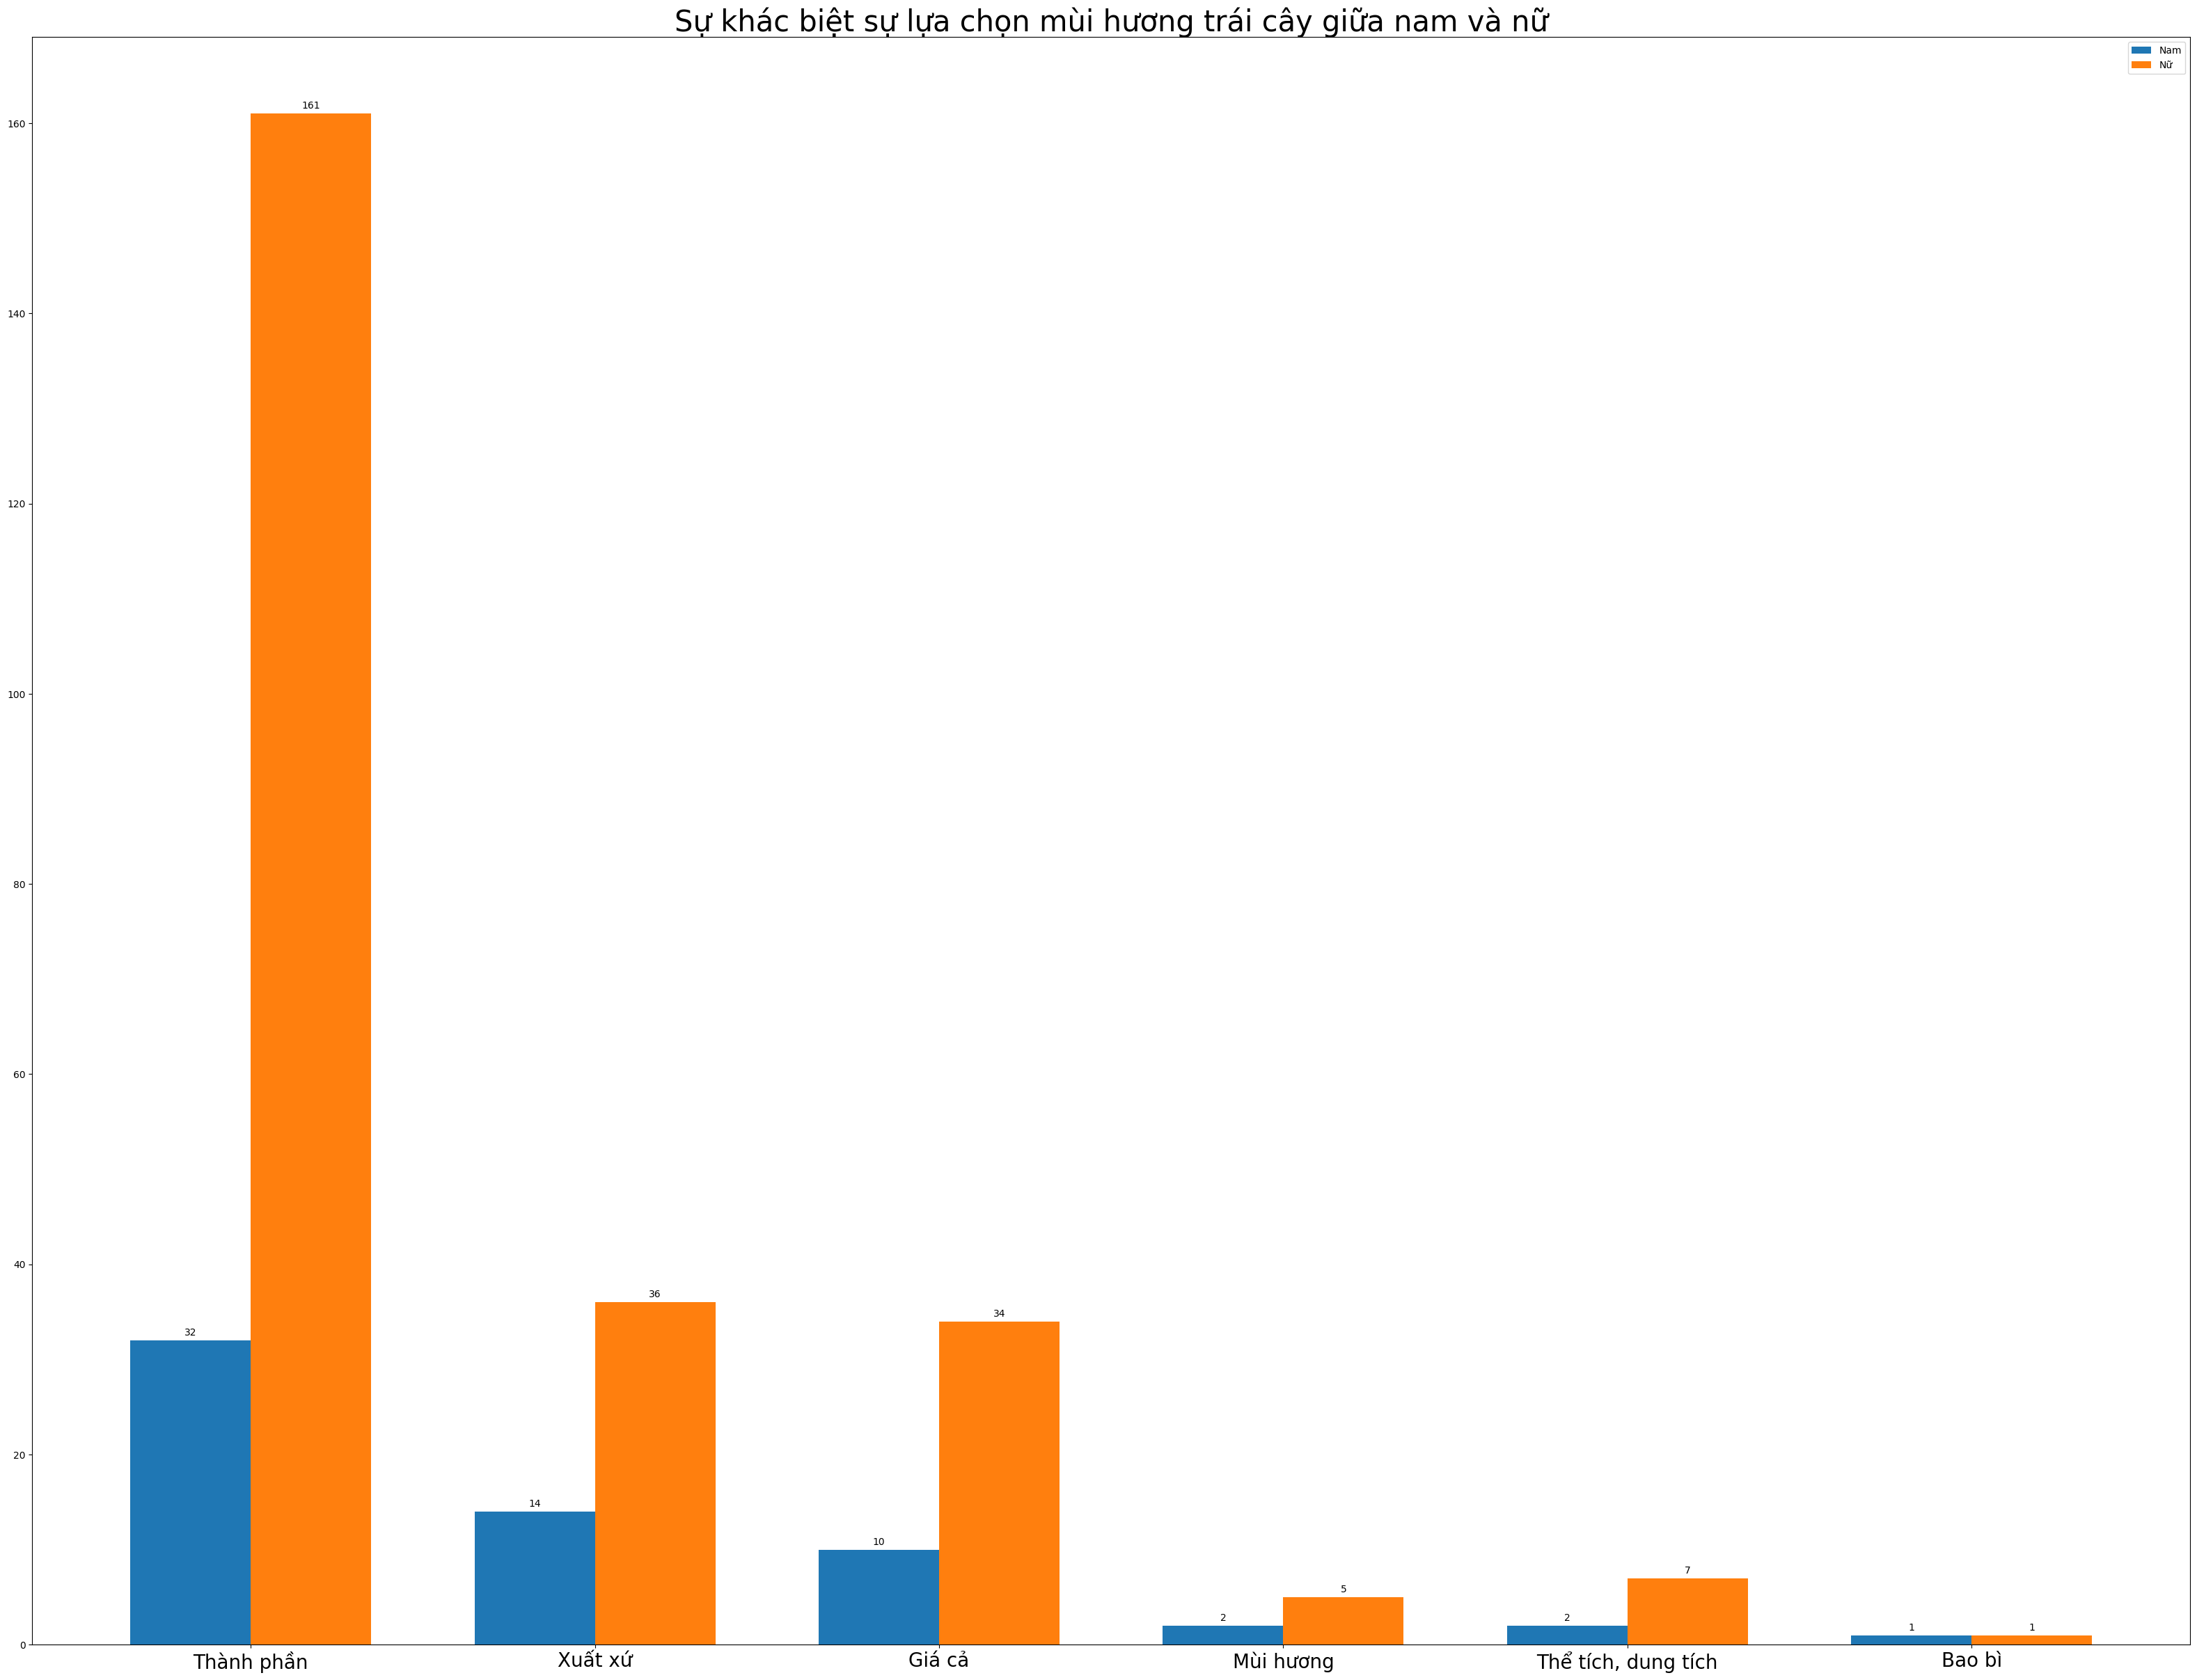

In [98]:
# TODO: Visualize
# Có một vấn đề xảy ra khi các keys của 2 factors không giống thứ tự nên visualize sẽ không đúng. do đó ta cần chuyển thành một dataFrame
# Tạo một dataframe mới từ 2 dict
dataFrame_13 = pd.DataFrame({'Nam' : male_factors, 'Nữ' :female_factors} ).T
print(dataFrame_13)

categories = dataFrame_13.columns 
male_counts = dataFrame_13.iloc[0]
female_counts = dataFrame_13.iloc[1]
x = np.arange(len(categories))  

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(40, 30))
bars1 = ax.bar(x - width/2, male_counts, width, label='Nam')
bars2 = ax.bar(x + width/2, female_counts, width, label='Nữ')

ax.bar_label(bars1, padding=3)
ax.bar_label(bars2, padding=3)

# Thêm thông tin cho biểu đồ
ax.set_title('Sự khác biệt sự lựa chọn mùi hương trái cây giữa nam và nữ', fontsize=30)
ax.set_xticks(x )
ax.set_xticklabels(categories, fontsize=20)
ax.legend()


### 4.2. Your question goes here

- Do not use the same motif (compare male and female) for your proposed question.
- What are the purposes of answering your questions?
- Answer your question then visualize if needed.

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, '21_Mức_ảnh_hưởng_của_chất_lượng'),
  Text(2, 0, '21_Mức_ảnh_hưởng_của_thương_hiệu'),
  Text(3, 0, '21_Mức_ảnh_hưởng_của_giá_cả'),
  Text(4, 0, '21_Mức_ảnh_hưởng_của_mẫu_mã'),
  Text(5, 0, '21_Mức_ảnh_hưởng_của_xuất_xứ'),
  Text(6, 0, '21_Mức_ảnh_hưởng_của_thành_phần'),
  Text(7, 0, '21_Mức_ảnh_hưởng_của_mùi_hương')])

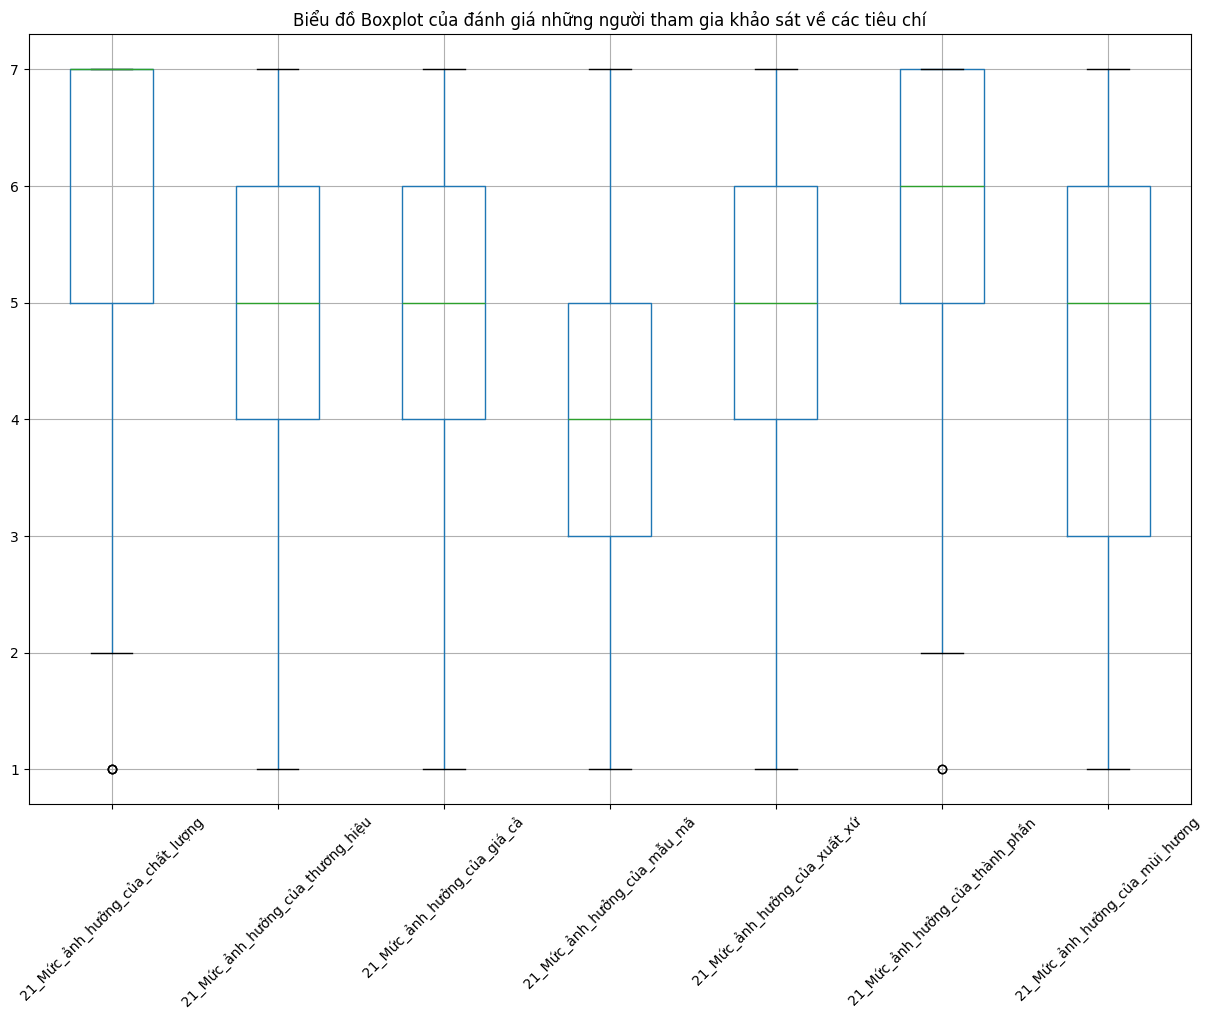

In [99]:
# TODO: answer your question here
# Có một các biểu diễn khác thay vì hist cho cột số, đó là boxplot. Boxplot có thể cho ta biết được phân bố của dữ liệu, giá trị trung vị, giá trị lớn nhất, giá trị nhỏ nhất, giá trị trung bình, giá trị outlier, ...
# Thêm phần nữa liệu rằng các cột số này có quan hệ gì với nhau không. ví dự như 2 tiêu chí được mọi người đánh giá như nhau 
mask = survey_df.columns.str.contains('21_')  
numeric_col = survey_df.loc[:, mask]

numeric_col.boxplot(figsize=(15, 10))
plt.title('Biểu đồ Boxplot của đánh giá những người tham gia khảo sát về các tiêu chí')
plt.xticks(rotation=45)

- Từ đây ta dẽ dàng nhận thấy tiêu chí chất lượng và thành phần của sản phẩm là quan trọng nhất khi người dùng chọn sữa rửa mặt. Dễ dàng nhận thấy hơn so với biểu đồ histogram. Khi ta có thể thấy được upper and lower quantitle, median. Ngoài ra dẽ thấy được range của các cột số và có thể phát hiện được outlier nữa.

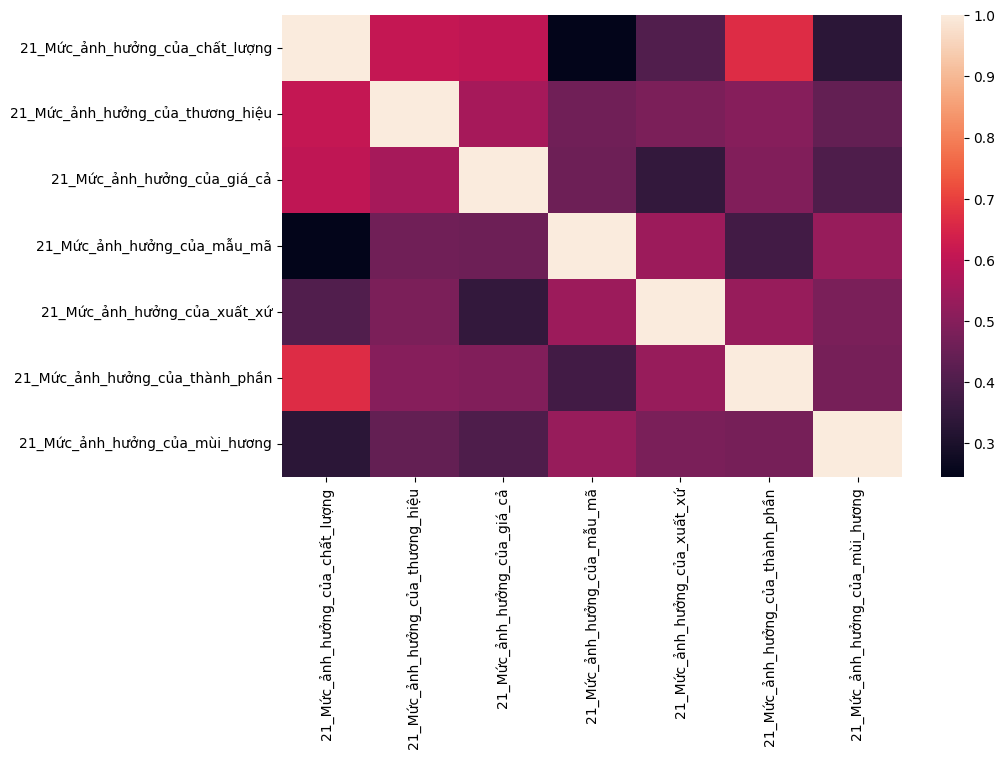

In [100]:
# TODO (OPTIONAL): visualize
# lập ma trặn tương quan giữa các cột số xem chúng có quan hệ gì với nhau không
corr_matrix = numeric_col.corr()
# Vẽ ma trận correlation bằng heatmap trong thư viện seaborn
plt.figure(figsize=(10,6))
ax = sns.heatmap(corr_matrix)


- Ta thấy rằng các cột đều có hệ số tượng quan rất thấp ( dưới 0.5). Từ đó có thể nhận xét rằng Những tiêu chí này độc lập với nhau và không ảnh hưởng lẫn nhau. 